# Data Visualization and Statistics

## Libraries and Configurations

Import configuration files

In [1]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../config.ini")

['../config.ini']

Import **data libraries**

In [2]:
import pandas as pd

# Import label encoder
from sklearn import preprocessing

Import **other libraries**

In [3]:
from rich.progress import Progress
from rich import traceback

traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x10c564c10>>

Custom helper scripts

In [4]:
%cd ..
from scripts import plotHelper, encodingHelper
%cd data_exploration_cleaning

/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks
/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks/data_exploration_cleaning


## Import Data

In [5]:
# Combined dataframe raw
combined_df_csv = (
    config["DEFAULT"]["interim_path"] + "encoded_LABEL_balanced_df_length.csv"
)

In [6]:
combined_df = pd.read_csv(combined_df_csv, index_col=0)

Fixing columns data types

In [7]:
combined_df.dtypes

Timestamp                    object
MAC Address                  object
Channel                       int64
DS Channel                  float64
HT Capabilities               int64
Extended Capabilities         int64
Vendor Specific Tags          int64
SSID                         object
Supported Rates               int64
Extended Supported Rates      int64
VHT Capabilities              int64
HE Capabilities               int64
Length                        int64
Label                        object
Length NO SSID                int64
dtype: object

In [8]:
# Converting Timestamp to datetime
combined_df["Timestamp"] = pd.to_datetime(combined_df["Timestamp"])

# Converting Label to string
combined_df["Label"] = combined_df["Label"].astype(str)

# Converting SSID to string
combined_df["SSID"] = combined_df["SSID"].astype(str)

# Converting MAC Address to string
combined_df["MAC Address"] = combined_df["MAC Address"].astype(str)

# Converting HT Capabilities to string
combined_df["HT Capabilities"] = combined_df["HT Capabilities"].astype(str)

# Converting Extended Capabilities to string
combined_df["Extended Capabilities"] = combined_df["Extended Capabilities"].astype(str)

# Converting Vendor Specific Tags to string
combined_df["Vendor Specific Tags"] = combined_df["Vendor Specific Tags"].astype(str)

# Converting Supported Rates to string
combined_df["Supported Rates"] = combined_df["Supported Rates"].astype(str)

# Converting Extended Supported Rates to string
combined_df["Extended Supported Rates"] = combined_df[
    "Extended Supported Rates"
].astype(str)

# Converting VHT Capabilities to string
combined_df["VHT Capabilities"] = combined_df["VHT Capabilities"].astype(str)

# Converting HE Capabilities to string
combined_df["HE Capabilities"] = combined_df["HE Capabilities"].astype(str)

## Data Visualization

### Data Distribution

In [9]:
combined_df

Timestamp        MAC Address  Channel  DS Channel  \
0     2023-05-20 13:52:01.864465952  d2:6b:aa:b5:fb:ed        1         1.0   
1     2023-05-20 13:52:01.884716034  d2:6b:aa:b5:fb:ed        1         1.0   
2     2023-05-20 13:52:01.910542011  d2:6b:aa:b5:fb:ed        6         6.0   
3     2023-05-20 13:52:01.930788994  d2:6b:aa:b5:fb:ed        6         6.0   
4     2023-05-20 13:52:01.968745947  d2:6b:aa:b5:fb:ed       11        11.0   
...                             ...                ...      ...         ...   
36055 2021-07-07 12:02:57.579541922  da:a1:19:00:17:f9        6         1.0   
36056 2021-07-07 11:32:04.533828019  da:a1:19:1a:cc:8f        6         8.0   
36057 2021-07-07 11:46:50.089955091  da:a1:19:41:c9:b1       11         5.0   
36058 2021-07-07 12:16:31.309731960  da:a1:19:c7:24:b1        1         3.0   
36059 2021-07-07 11:19:07.014556885  da:a1:19:05:11:80        1         5.0   

      HT Capabilities Extended Capabilities Vendor Specific Tags  \
0                   6                    17                   -1   
1                   6                    17                   -1   
2                   6                    17                   -1   
3                   6                    17                   -1   
4                   6                    17                   -1   
...               ...                   ...                  ...   
36055               8                     7                   25   
36056               8                     7                   25   
36057               8                     7                   25   
36058               8                     7                   25   
36059               8                     7                   25   

                   SSID Supported Rates Extended Supported Rates  \
0                    -1               2                        0   
1                    -1               2                        0   
2                    -1               2                        0   
3                    -1               2                        0   
4                    -1               2                        0   
...                 ...             ...                      ...   
36055                -1               0                        0   
36056  Wind3 HUB-6D1619               0                        0   
36057                -1               0                        0   
36058                -1               0                        0   
36059  Wind3 HUB-6D1619               0                        0   

      VHT Capabilities HE Capabilities  Length               Label  \
0                   -1              62     135       iPhone12Pro_C   
1                   -1              62     135       iPhone12Pro_C   
2                   -1              62     135       iPhone12Pro_C   
3                   -1              62     135       iPhone12Pro_C   
4                   -1              62     135       iPhone12Pro_C   
...                ...             ...     ...                 ...   
36055                0              13     182  XiaomiRedmiNote7_S   
36056                0              14     198  XiaomiRedmiNote7_S   
36057                0              32     143  XiaomiRedmiNote7_S   
36058                0              14     182  XiaomiRedmiNote7_S   
36059                0              14     198  XiaomiRedmiNote7_S   

       Length NO SSID  
0                 135  
1                 135  
2                 135  
3                 135  
4                 135  
...               ...  
36055             182  
36056             182  
36057             143  
36058             182  
36059             182  

[36060 rows x 15 columns]

Number of Probe Requests entries per device

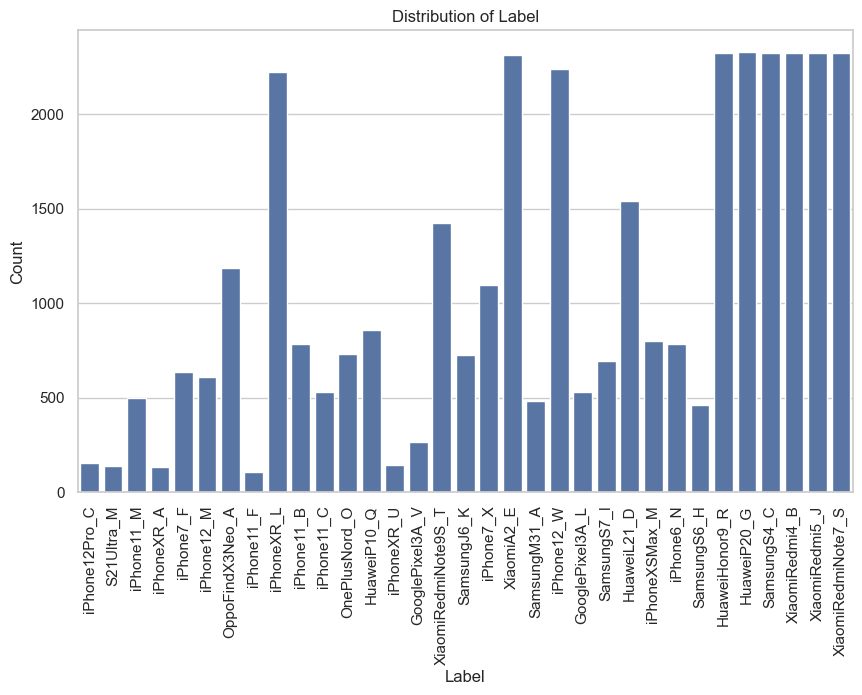

In [10]:
plotHelper.plot_label_distribution(combined_df, "Label")

### Packet Length

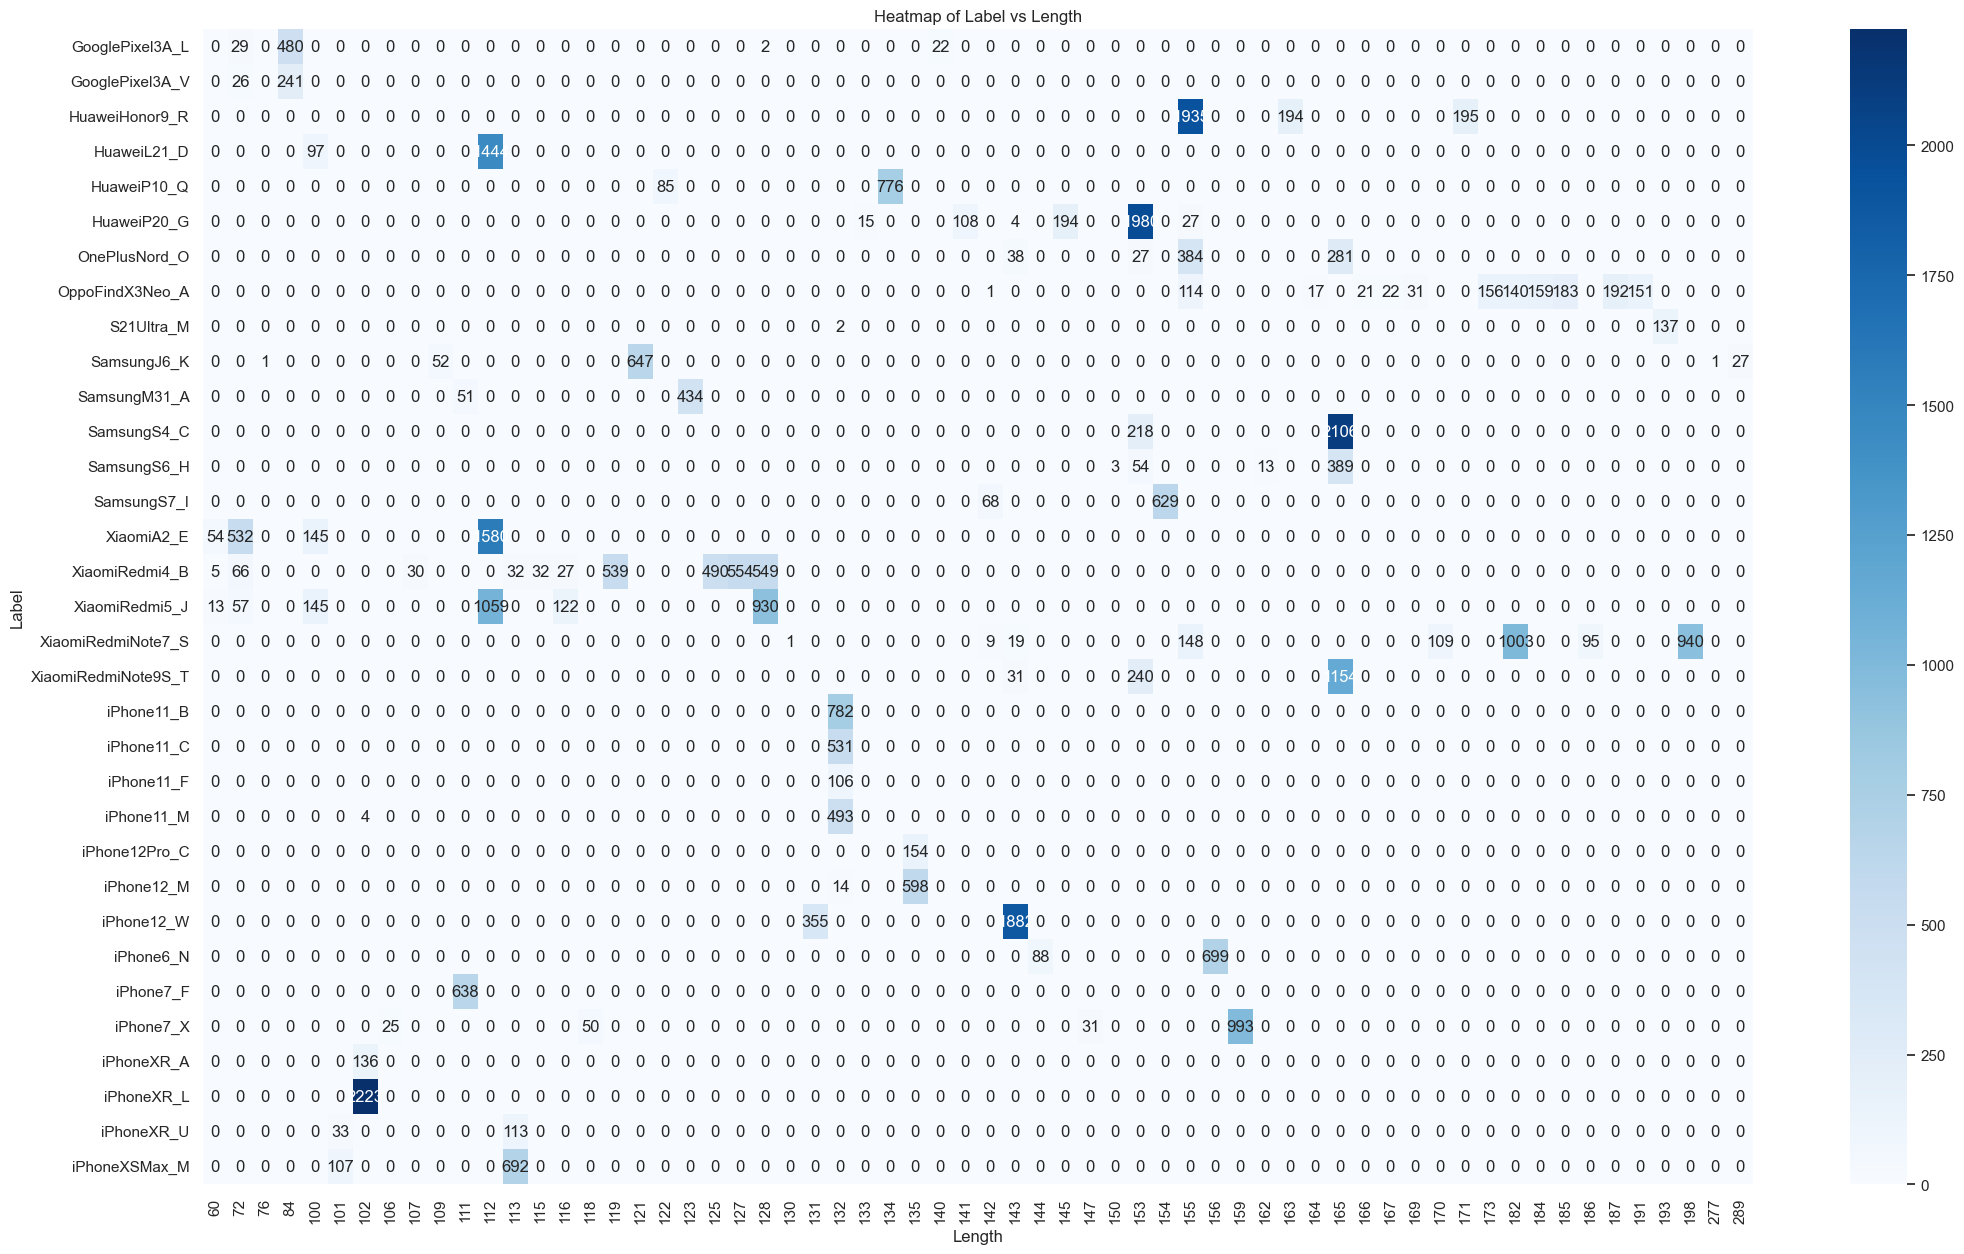

In [11]:
plotHelper.plot_heatmap(combined_df, "Label", "Length")

/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks/scripts/plotHelper.py:170: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


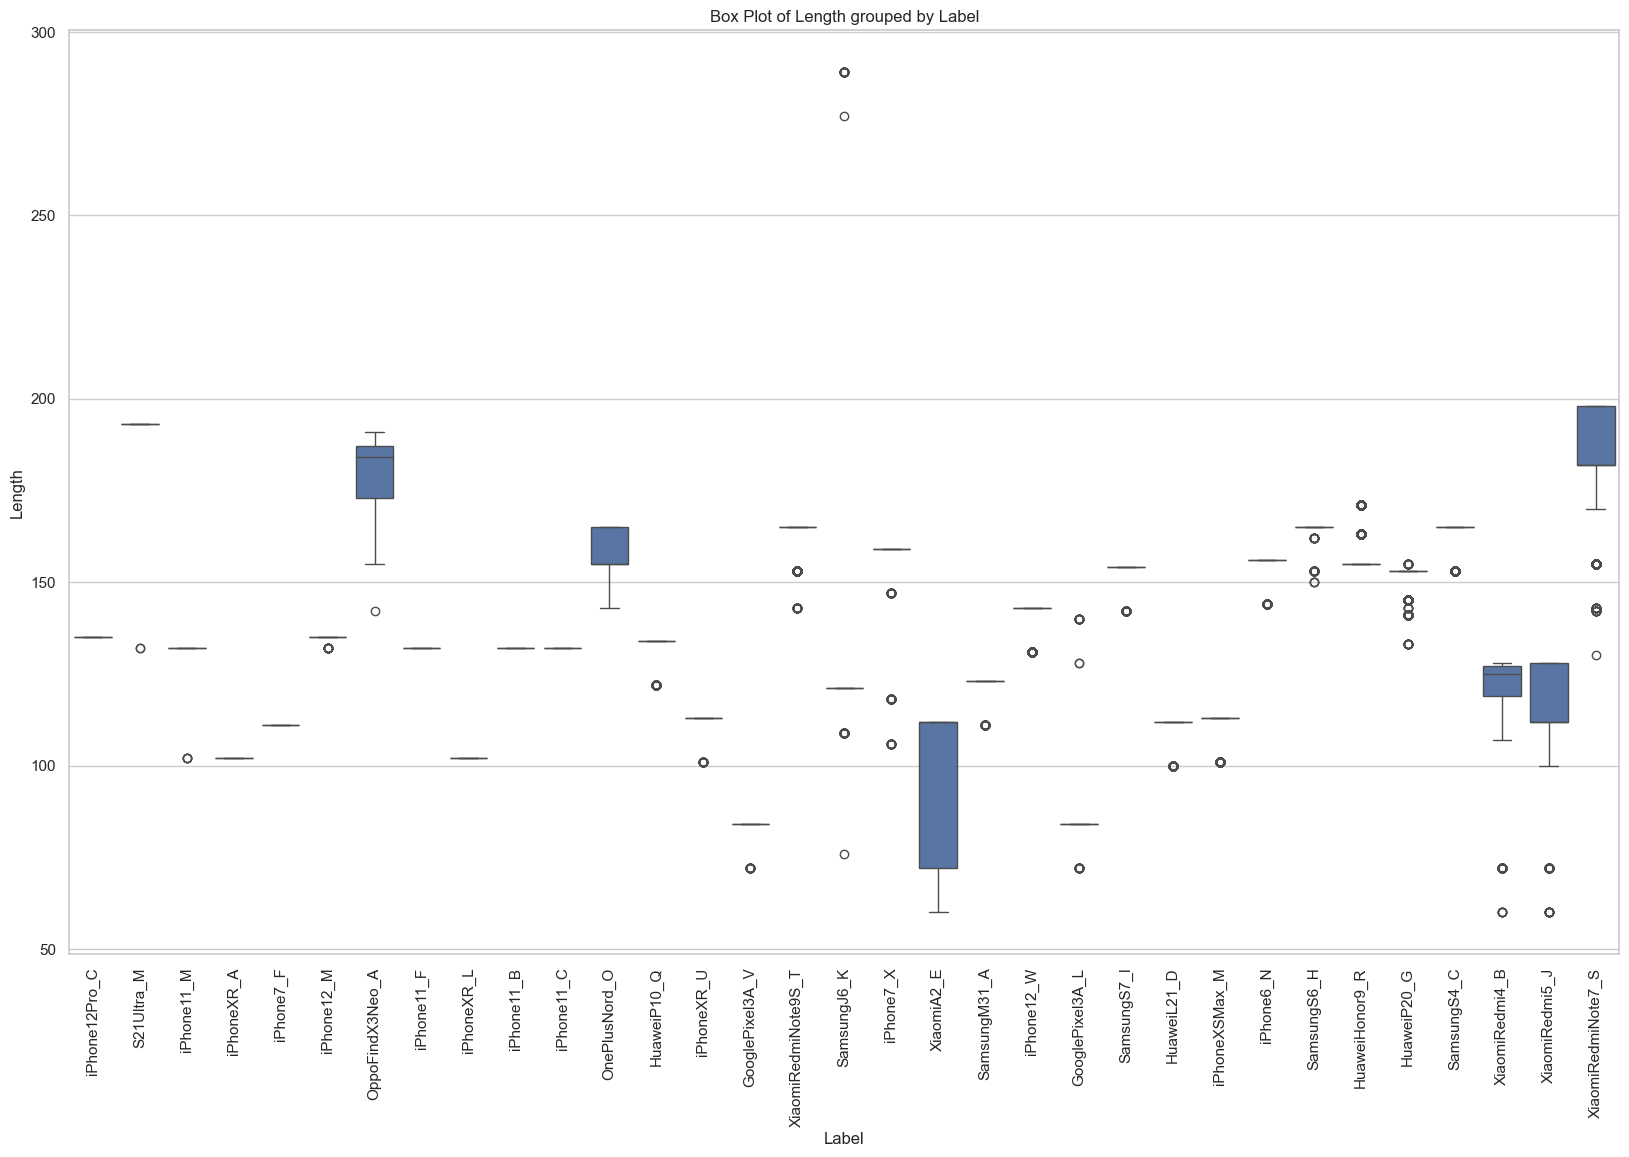

In [12]:
plotHelper.plot_boxplot(combined_df, "Label", "Length")

Plotting packet length, without considering SSID bytes

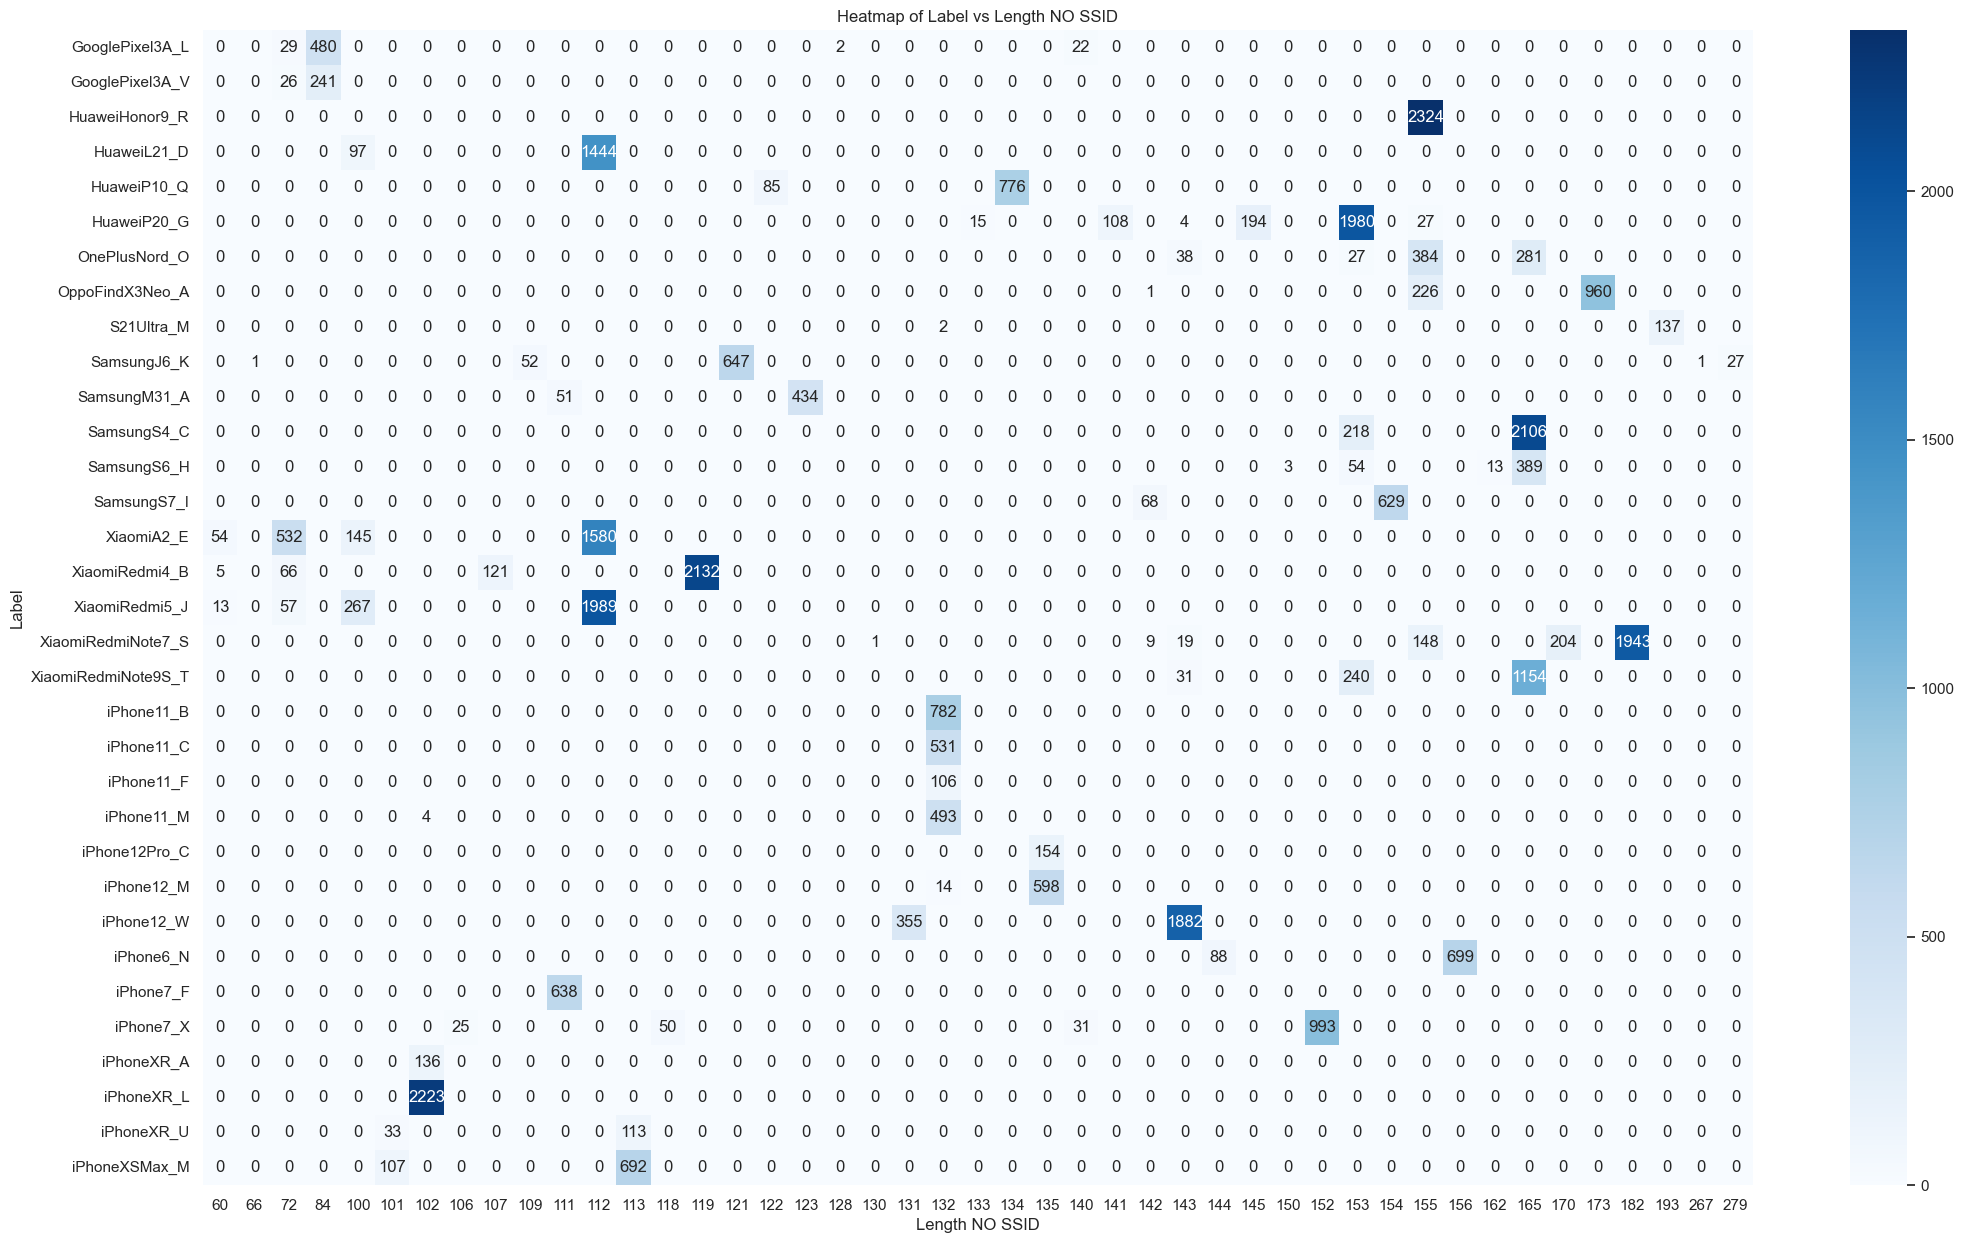

In [13]:
plotHelper.plot_heatmap(combined_df, "Label", "Length NO SSID")

### SSIDs

Percentage of SSIDs disclosed in Probe Requests.

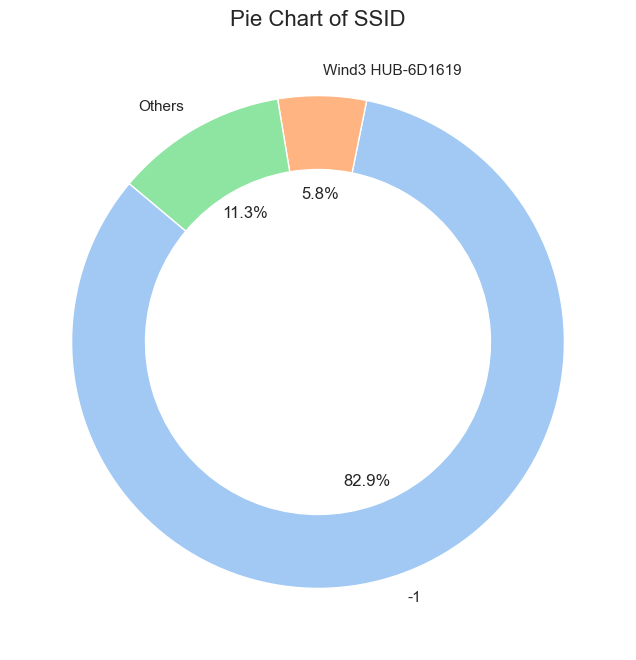

In [14]:
plotHelper.plot_pie_chart(combined_df, "SSID")

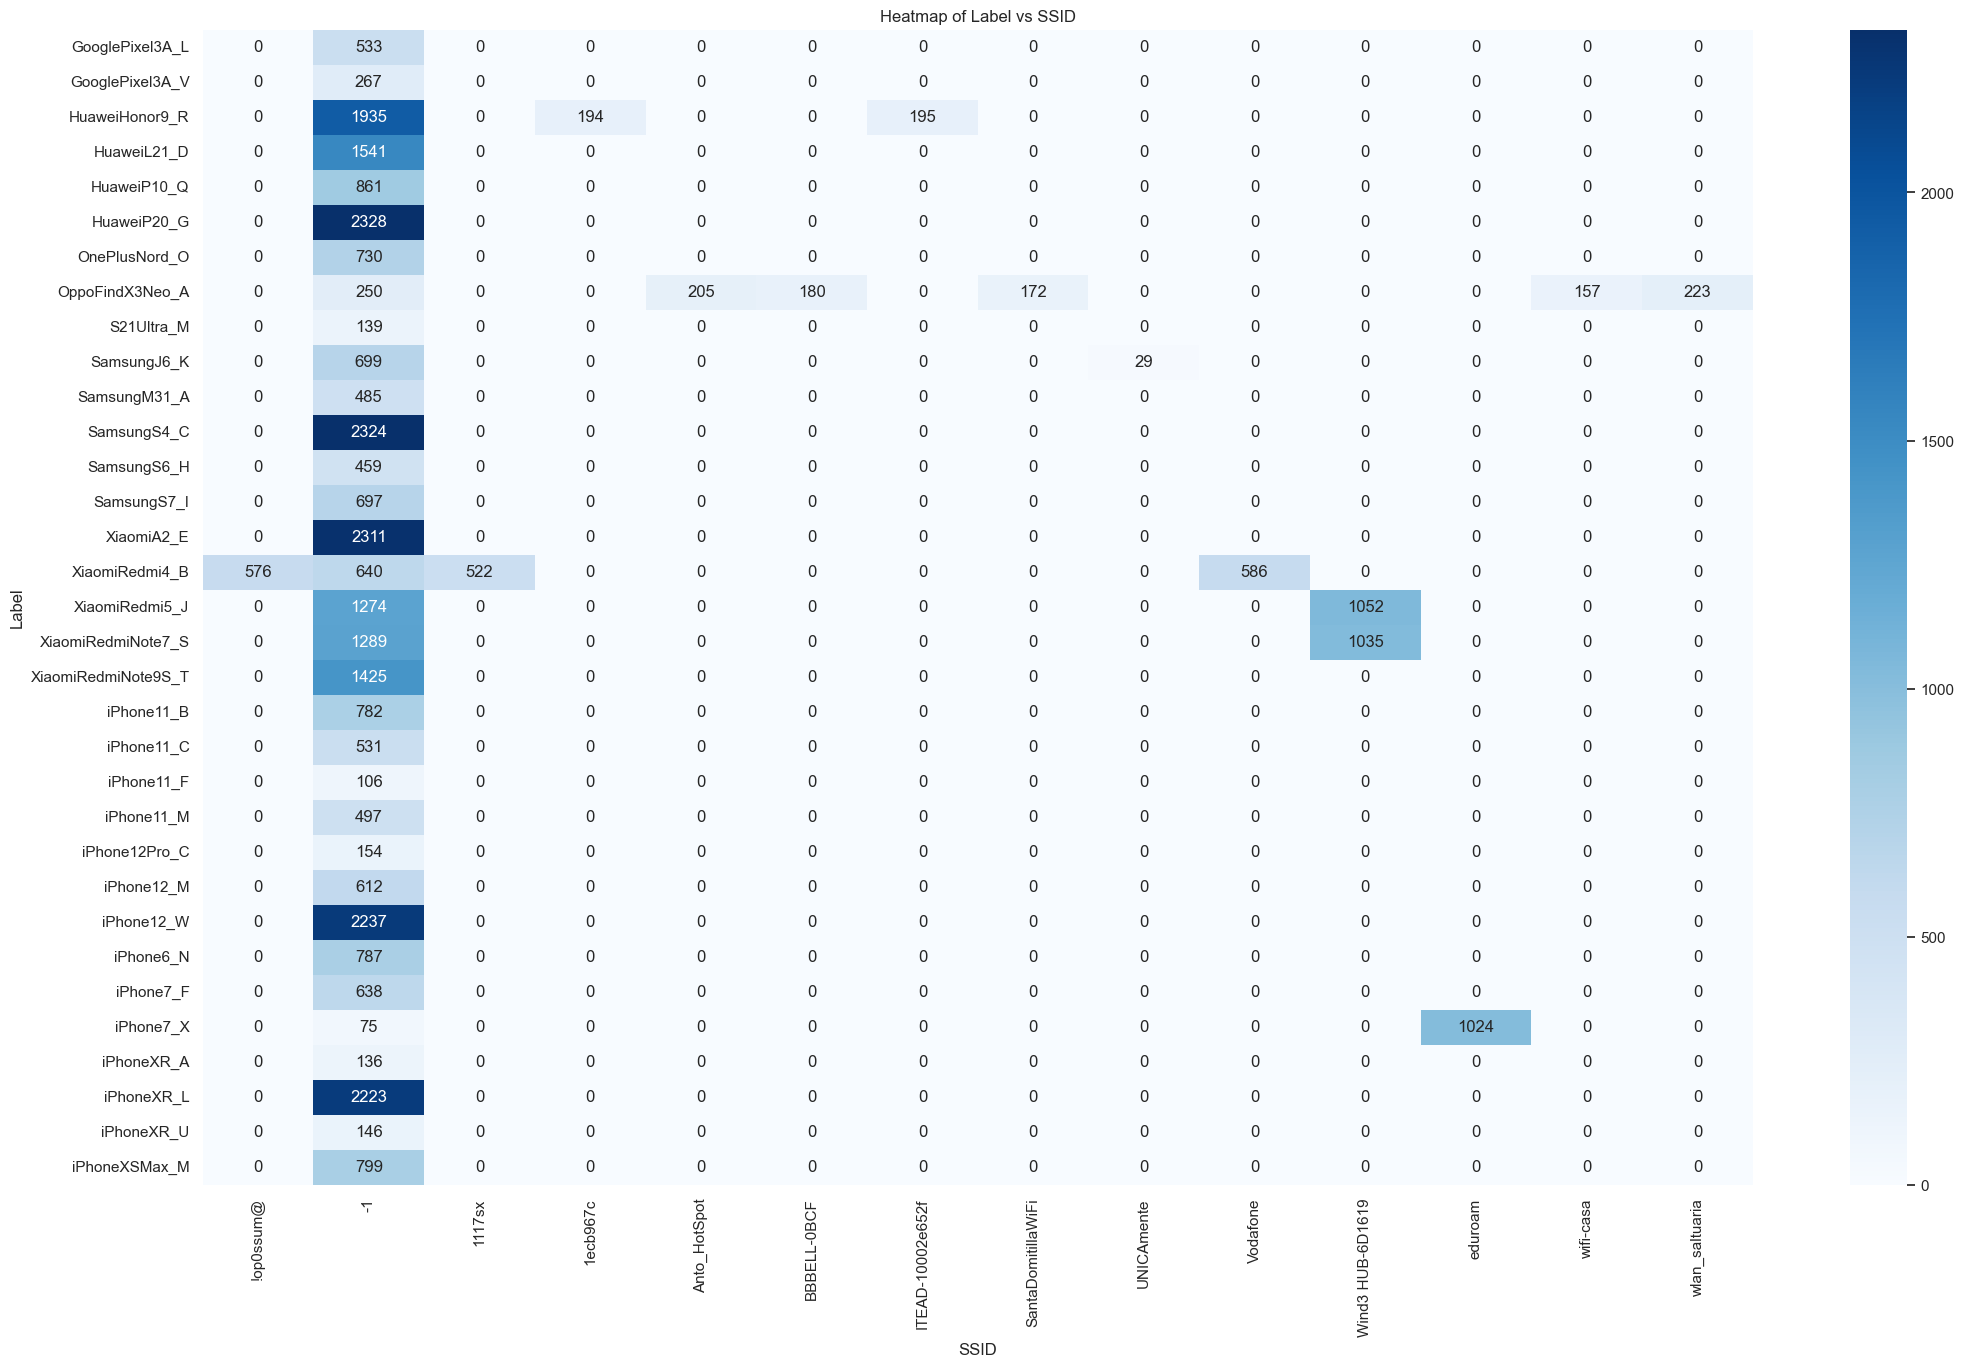

In [15]:
plotHelper.plot_heatmap(combined_df, "Label", "SSID")

In [16]:
print(
    combined_df[combined_df["SSID"] != "-1"]["Label"].nunique(),
    "devices disclosing SSID out of",
    combined_df["Label"].nunique(),
    "->",
    round(
        combined_df[combined_df["SSID"] != "-1"]["Label"].nunique()
        / combined_df["Label"].nunique()
        * 100,
        2,
    ),
    "%",
)

7 devices disclosing SSID out of 33 -> 21.21 %


### Channel Utilization

`Channel` usage per device

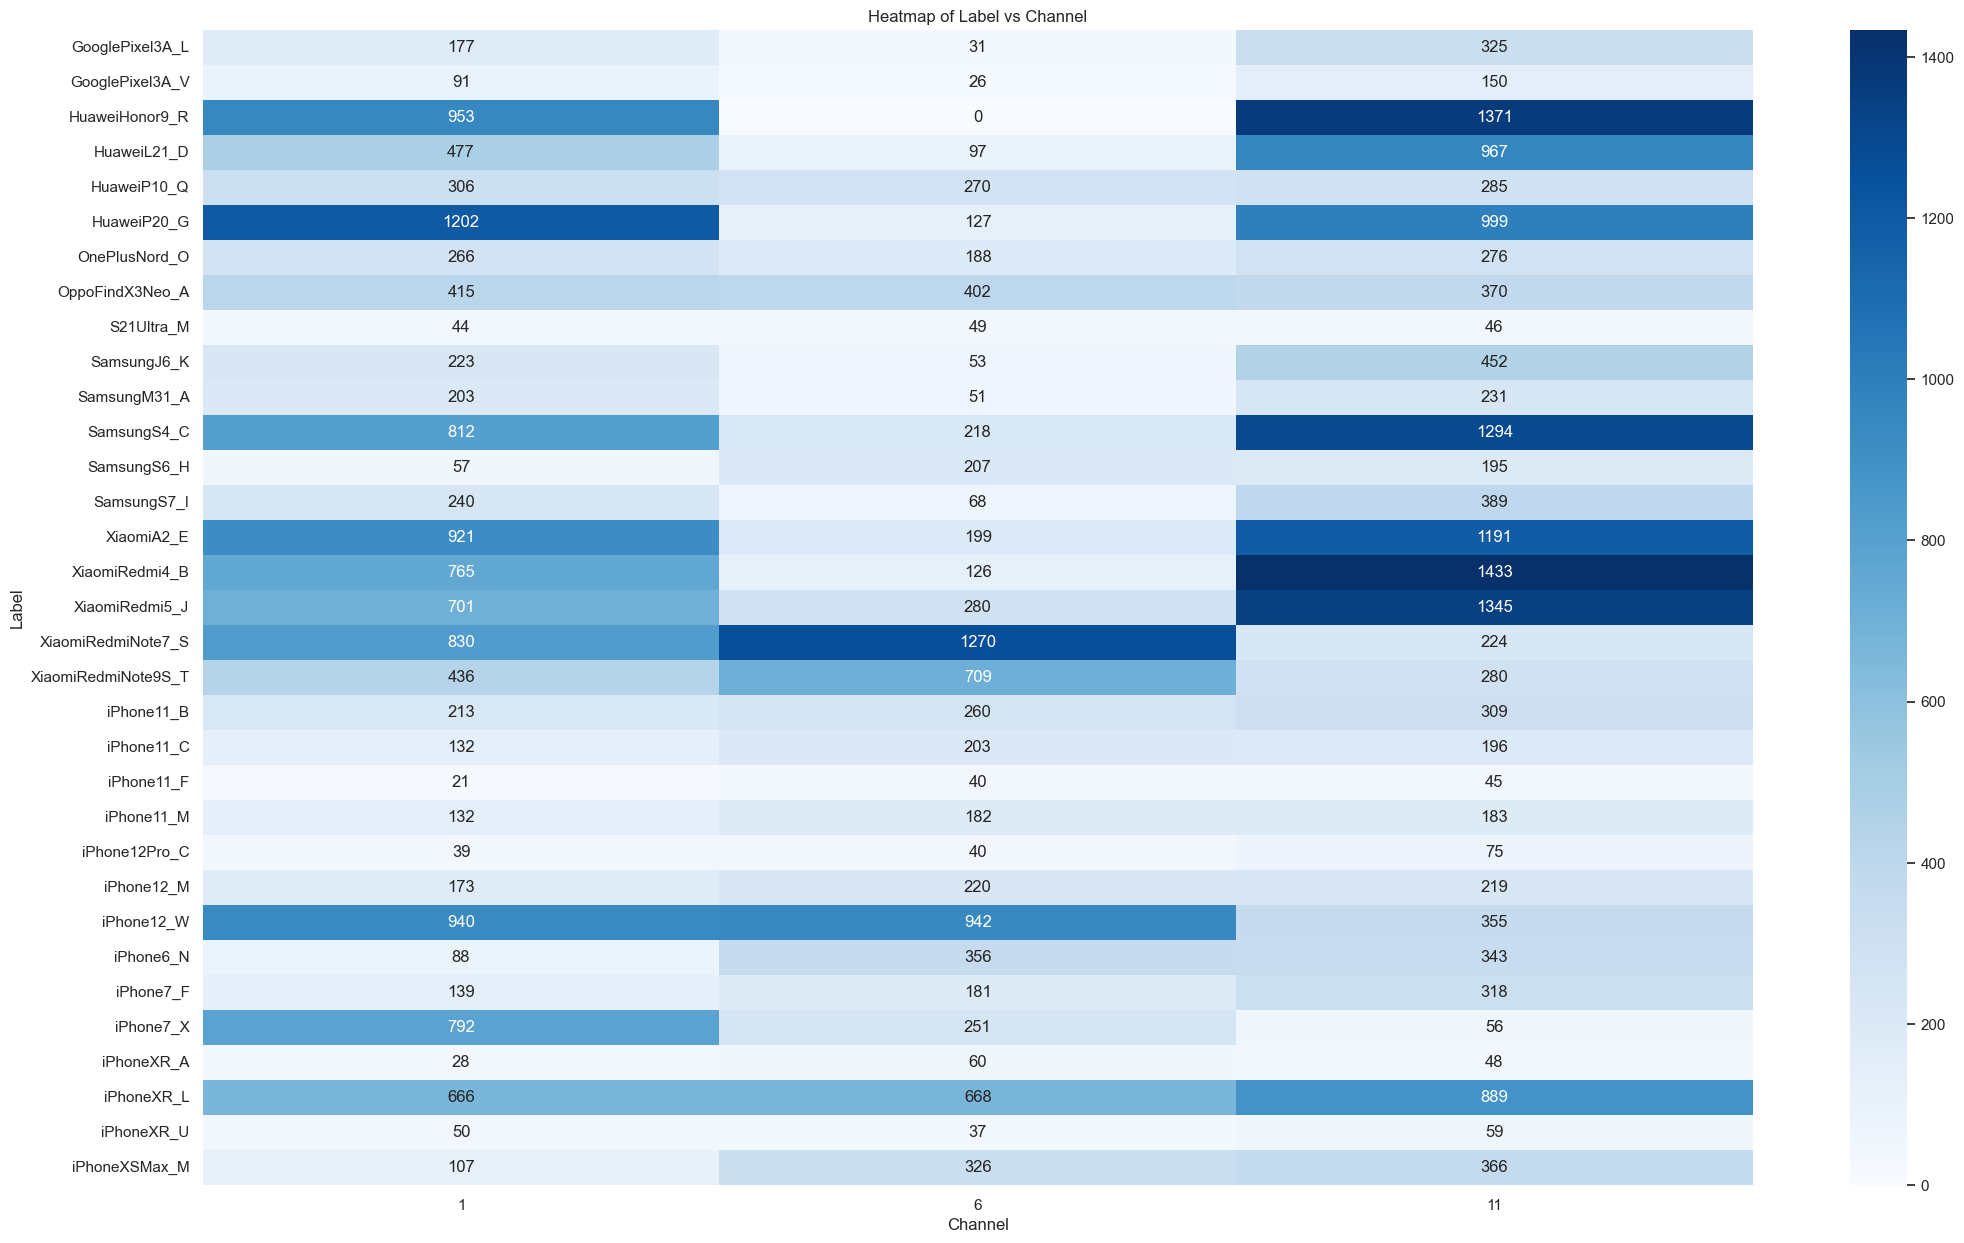

In [17]:
plotHelper.plot_heatmap(combined_df, "Label", "Channel")

`DS Channel` usage per device

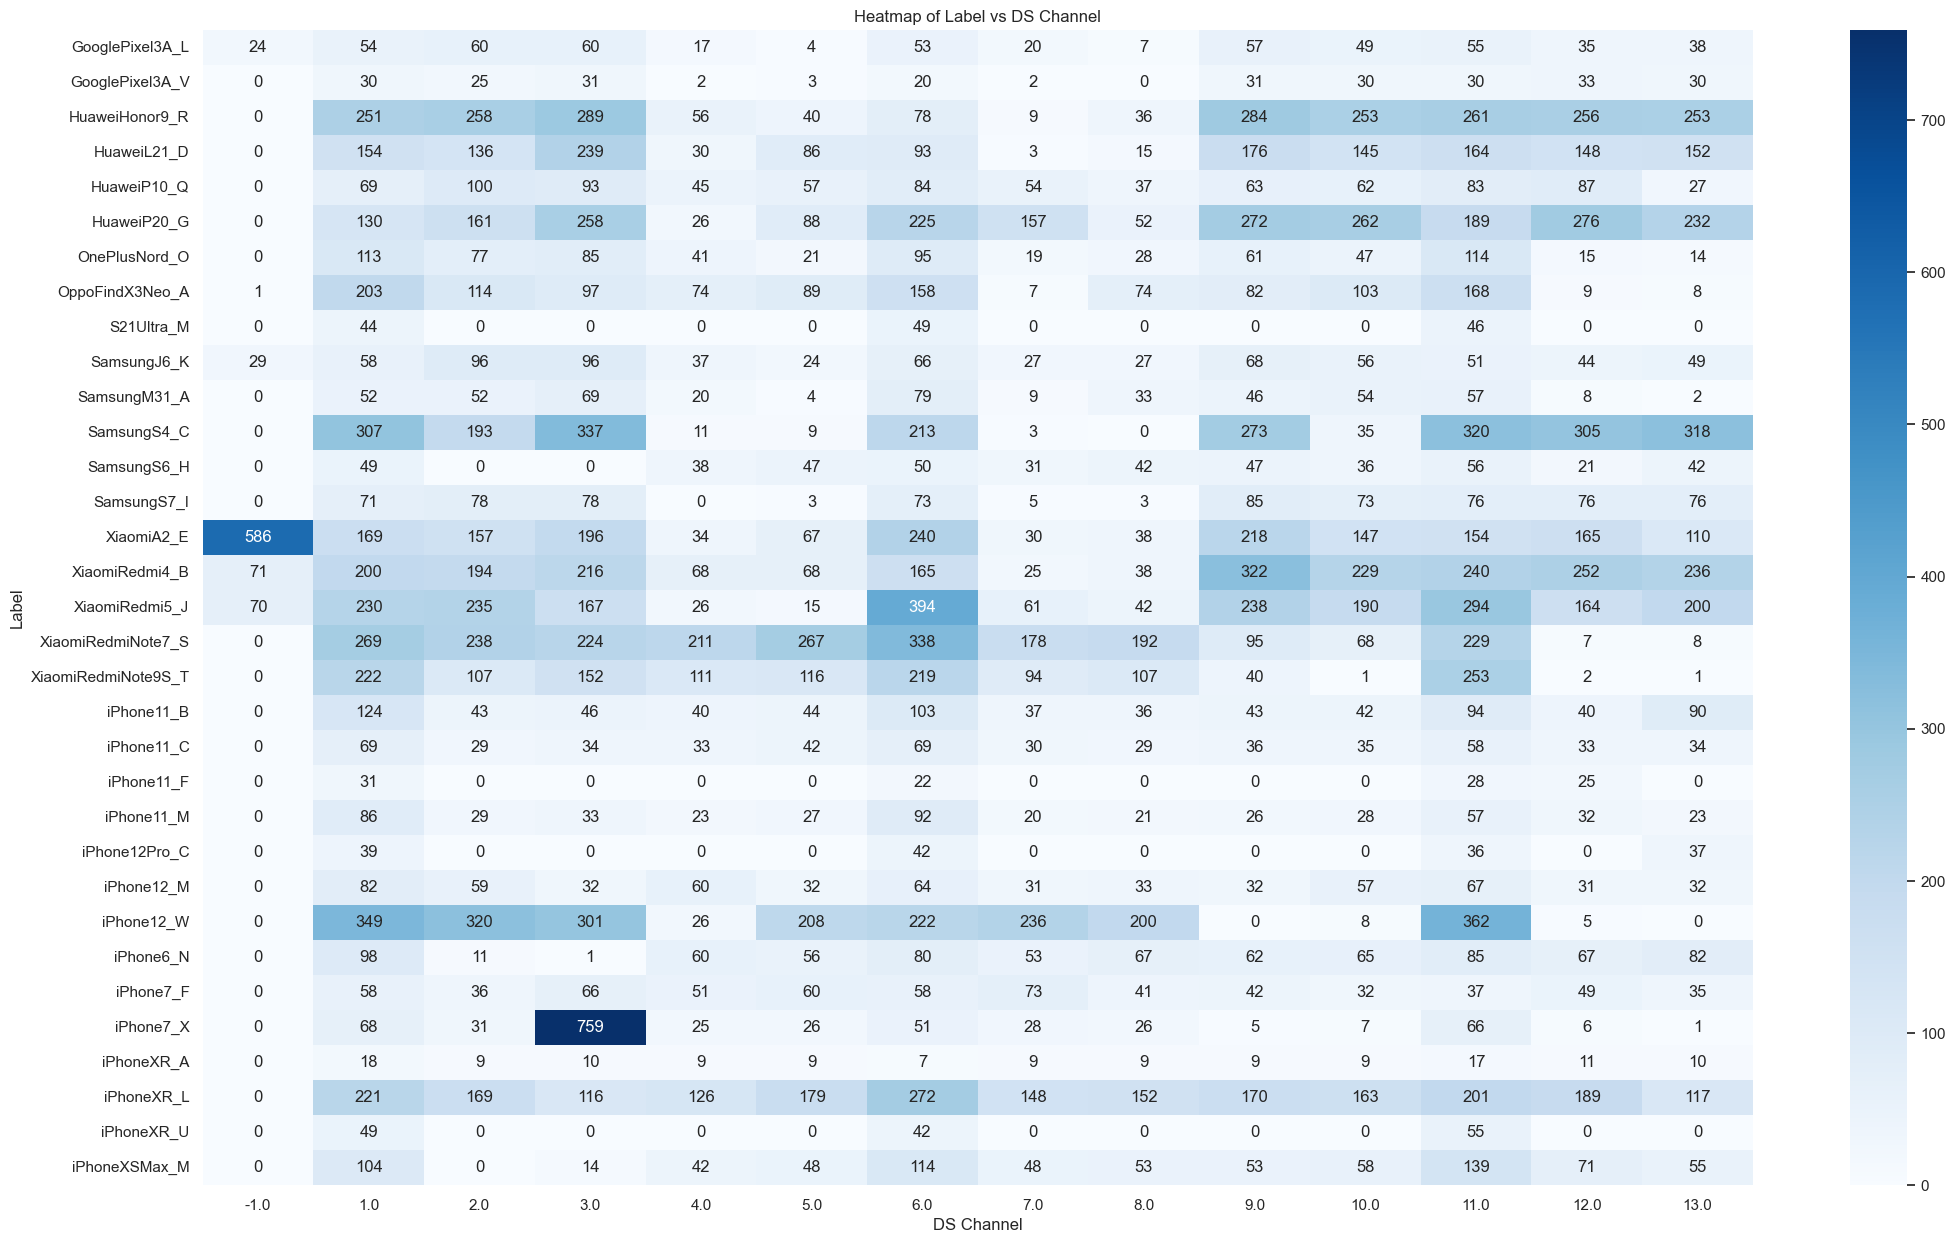

In [18]:
plotHelper.plot_heatmap(combined_df, "Label", "DS Channel")

`DS Channel` parameter distribution on actual `Channel` frequencies.

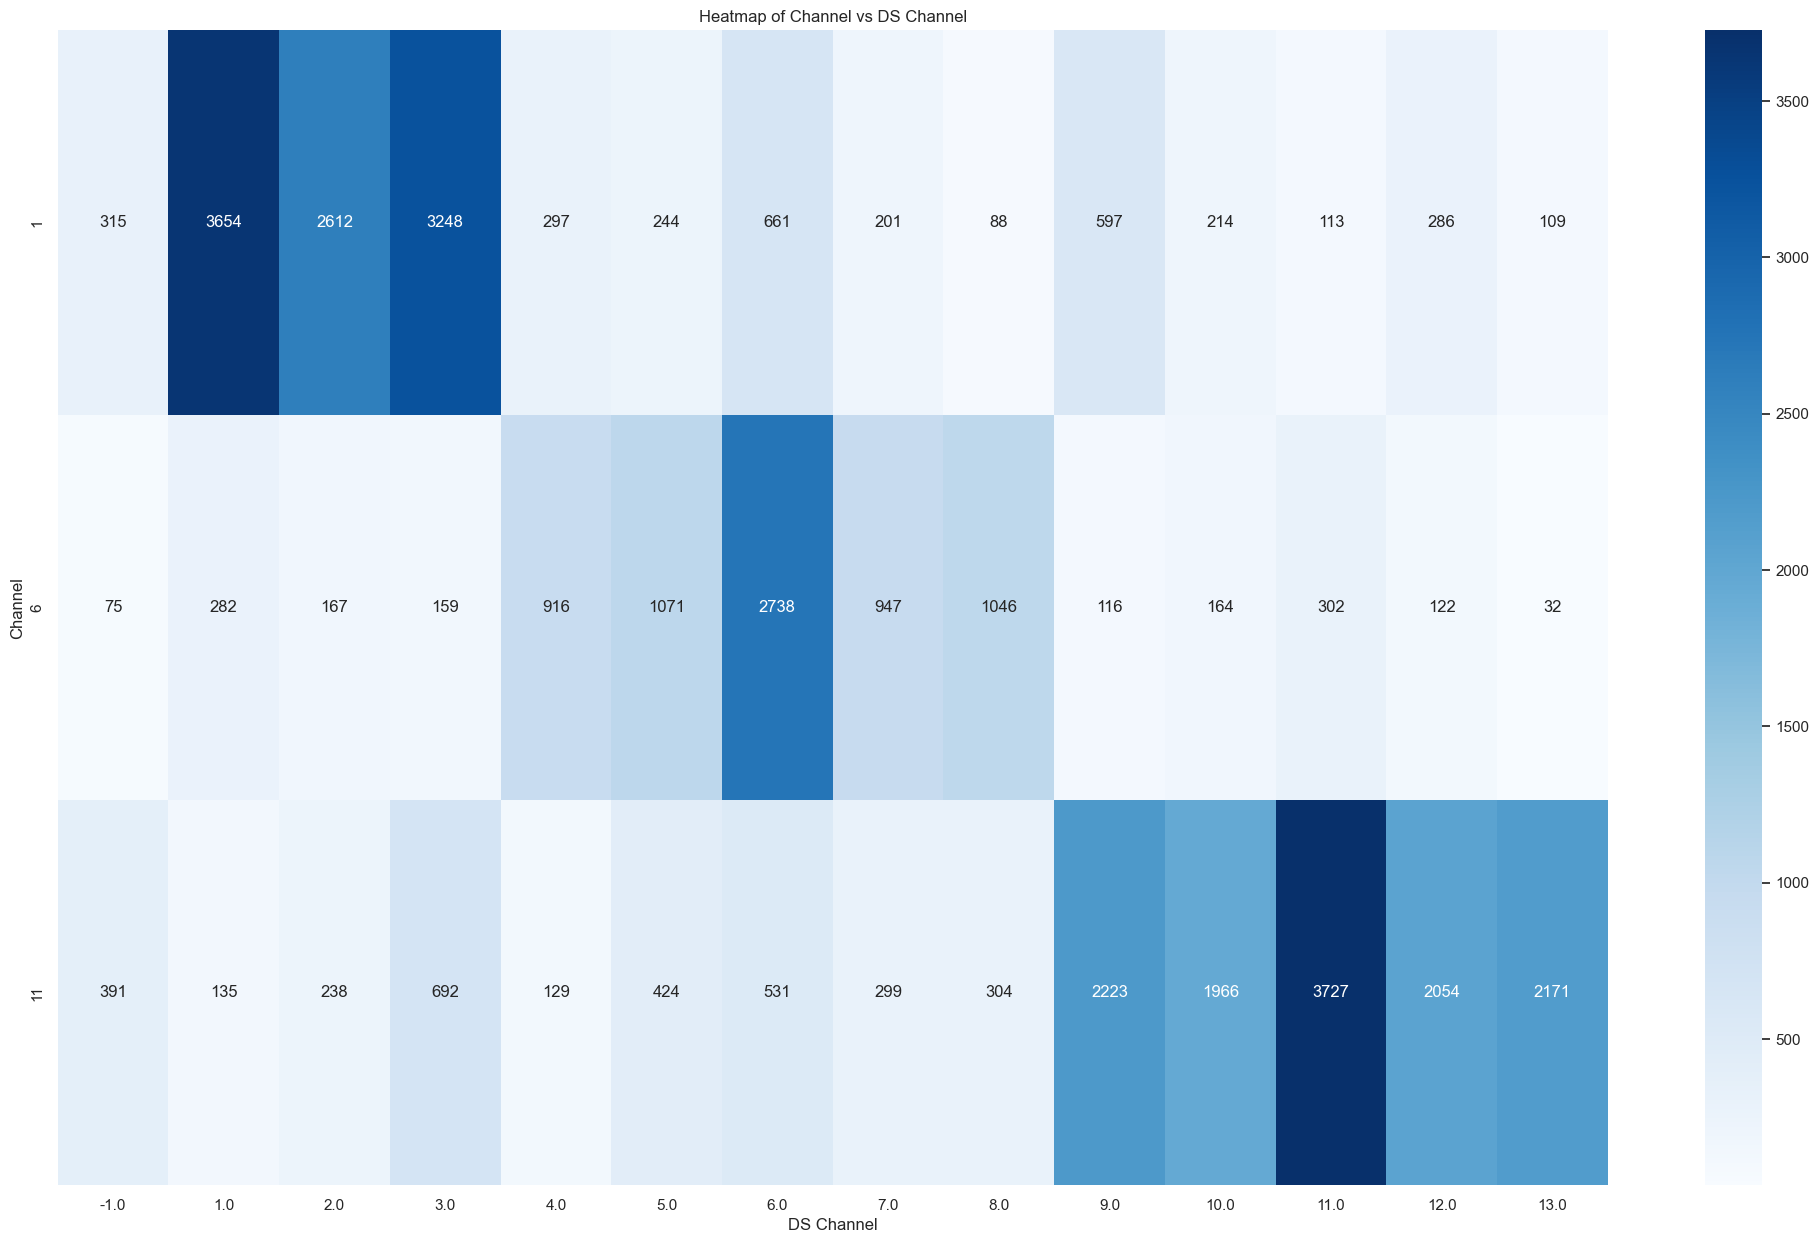

In [19]:
plotHelper.plot_heatmap(combined_df, "Channel", "DS Channel")

Plotting `Channel` usage per single device

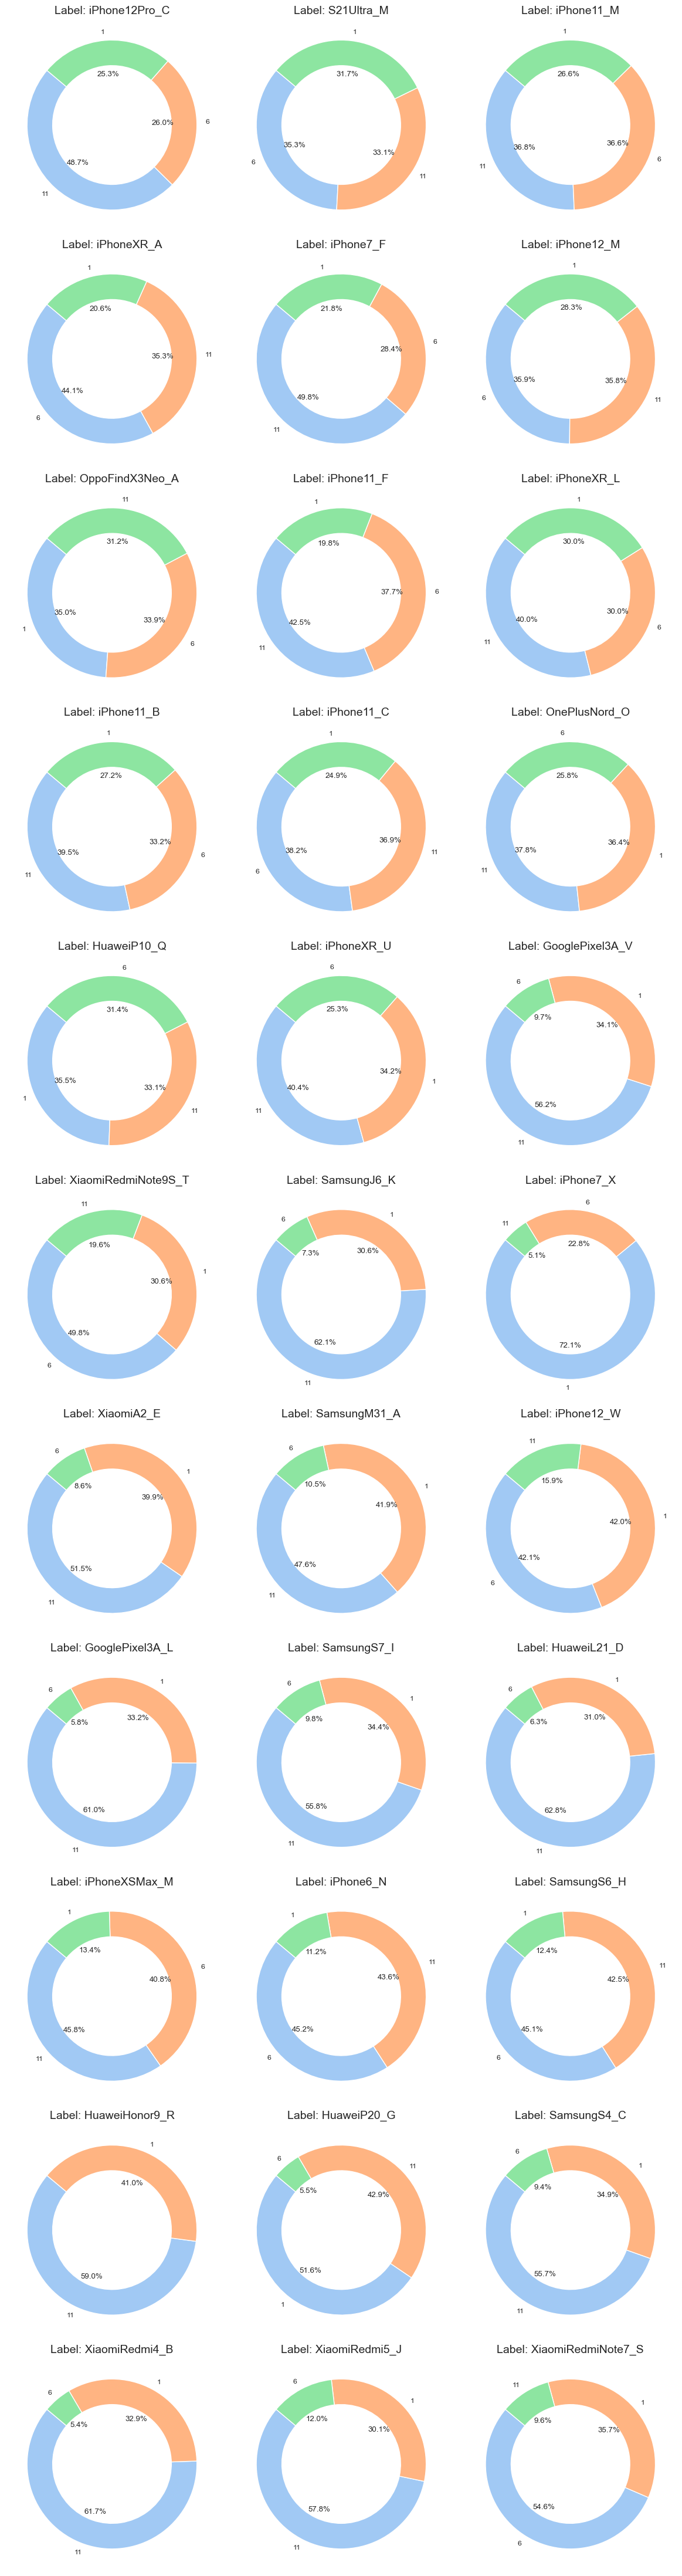

In [20]:
plotHelper.plot_multi_pie_charts(combined_df, "Label", "Channel")

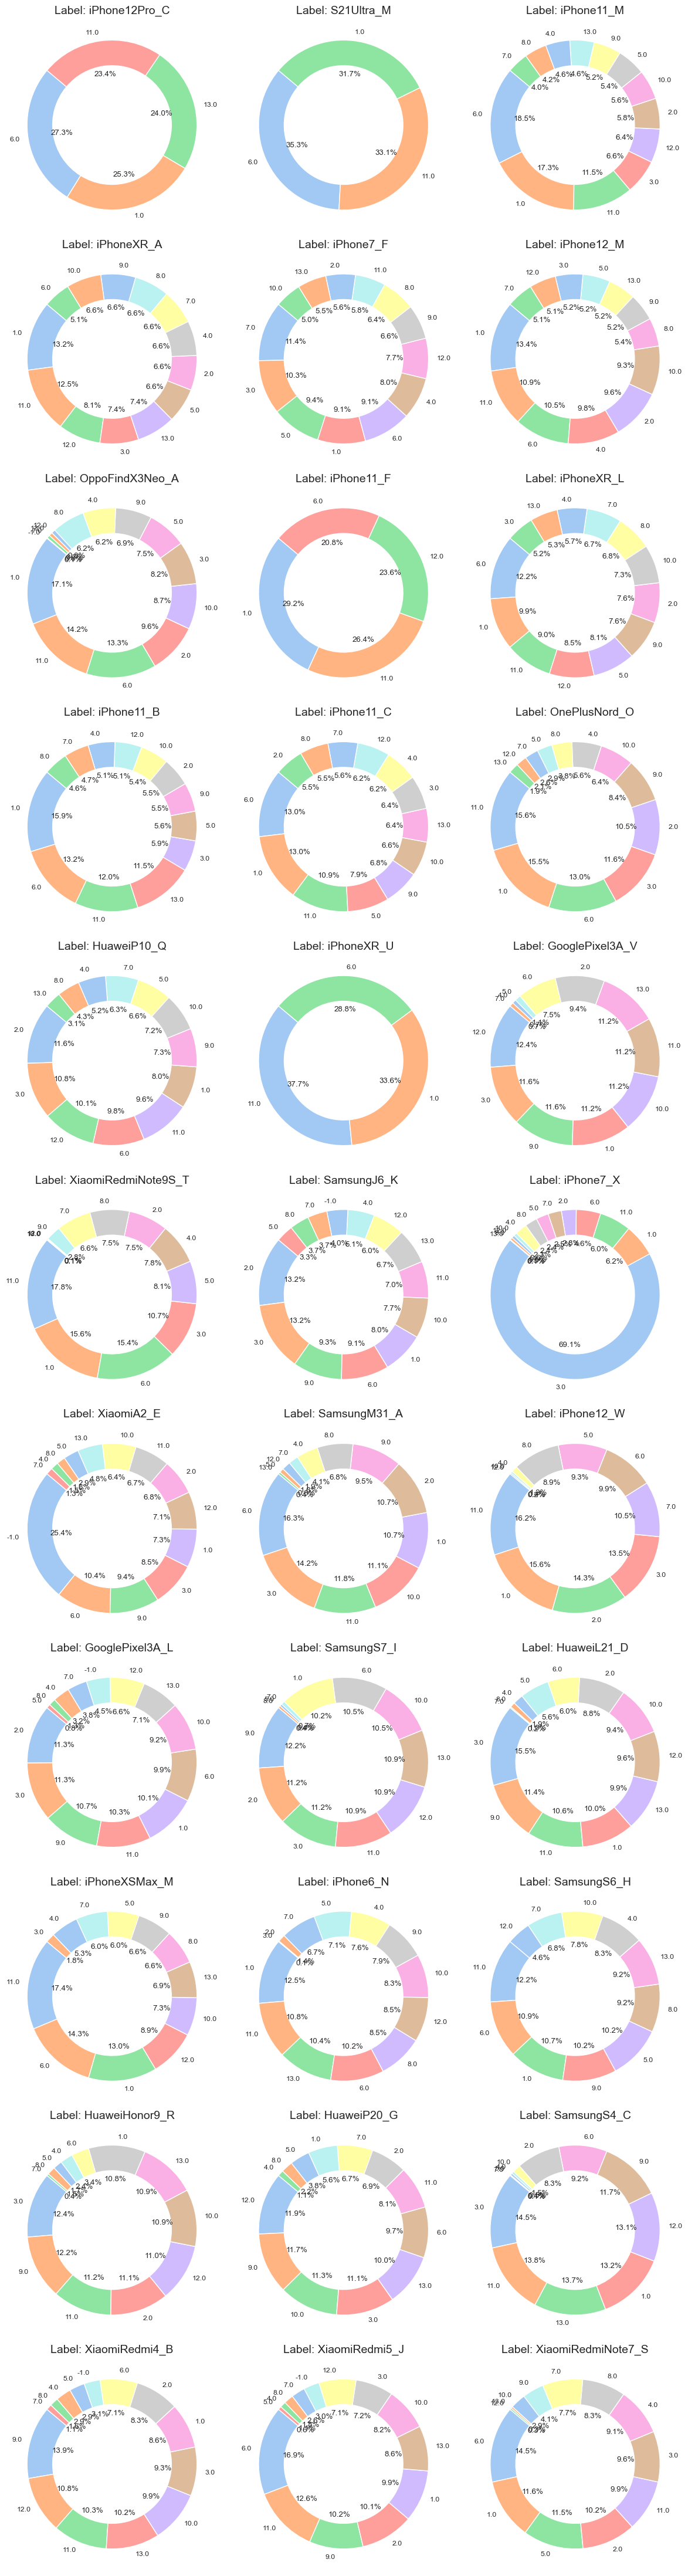

In [21]:
plotHelper.plot_multi_pie_charts(combined_df, "Label", "DS Channel")

/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks/scripts/plotHelper.py:170: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


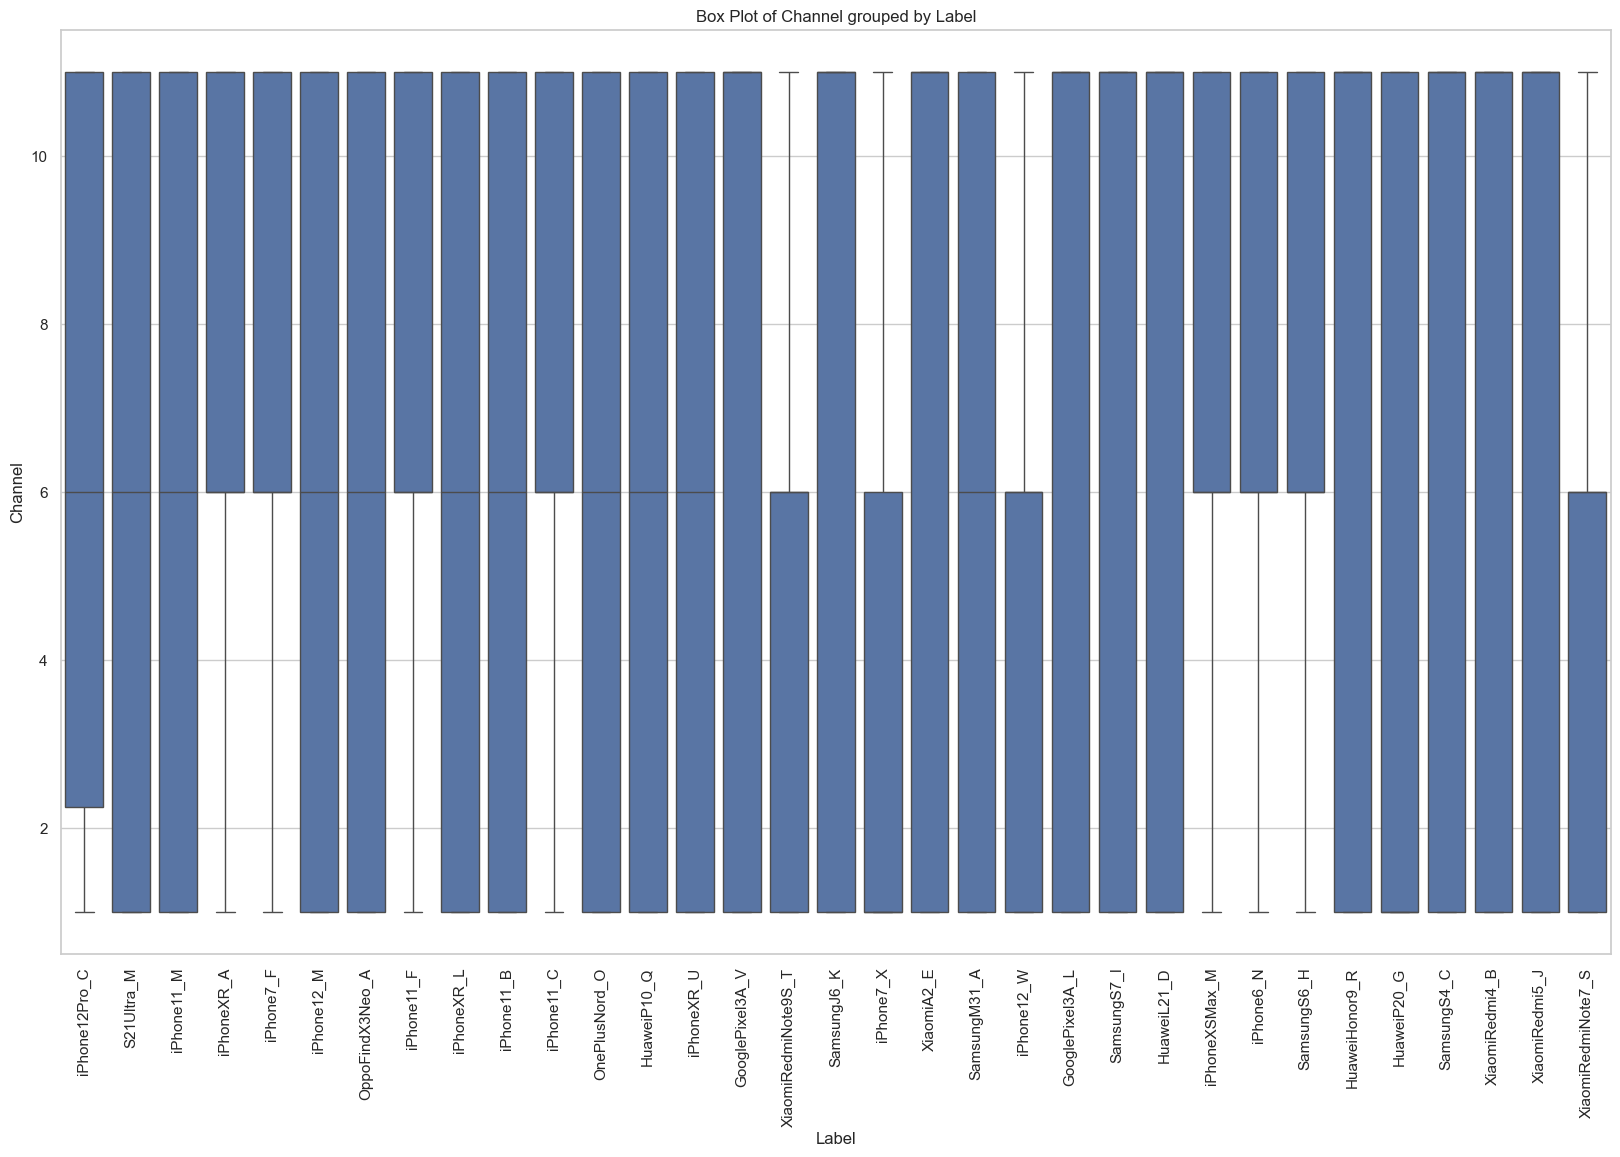

In [22]:
plotHelper.plot_boxplot(combined_df, "Label", "Channel")

/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks/scripts/plotHelper.py:170: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


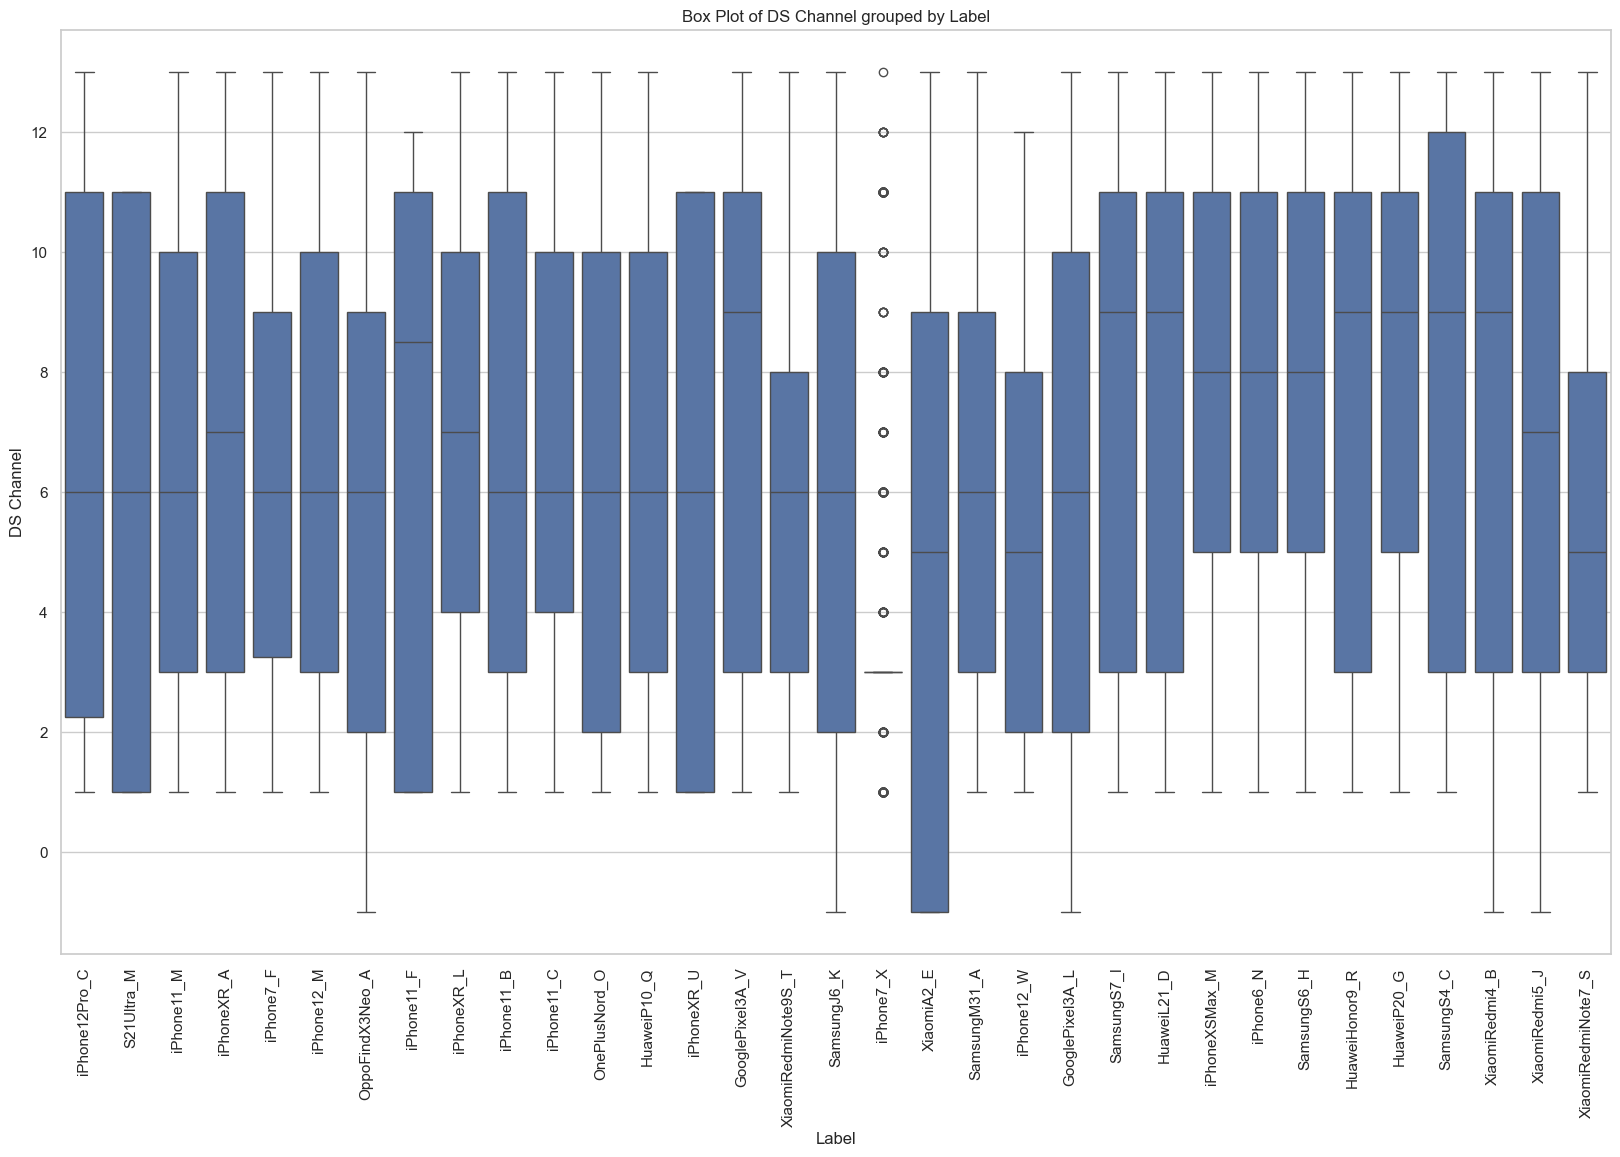

In [23]:
plotHelper.plot_boxplot(combined_df, "Label", "DS Channel")

### Information Elements

#### HT Capabilities

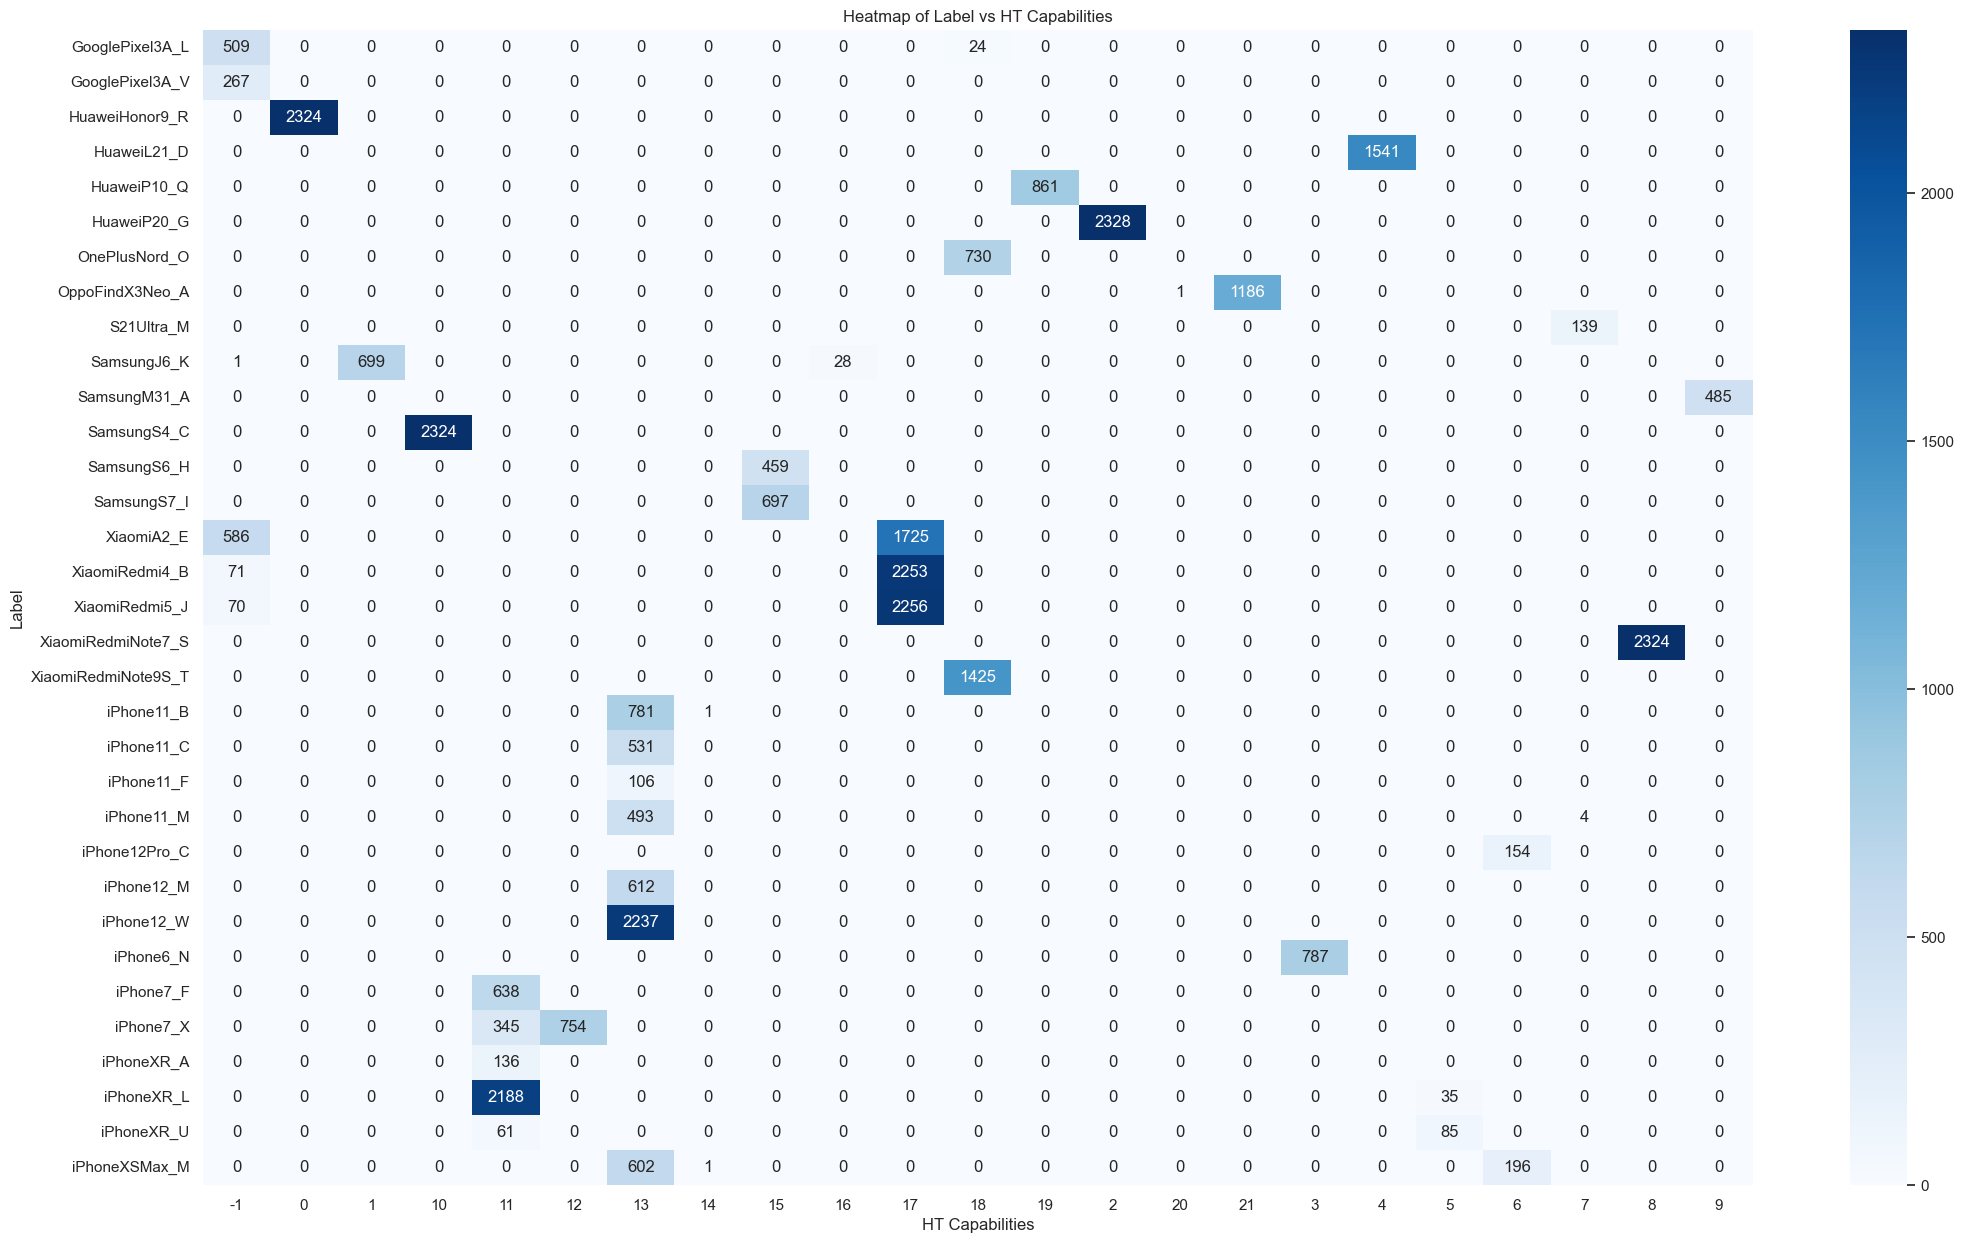

In [24]:
plotHelper.plot_heatmap(combined_df, "Label", "HT Capabilities")

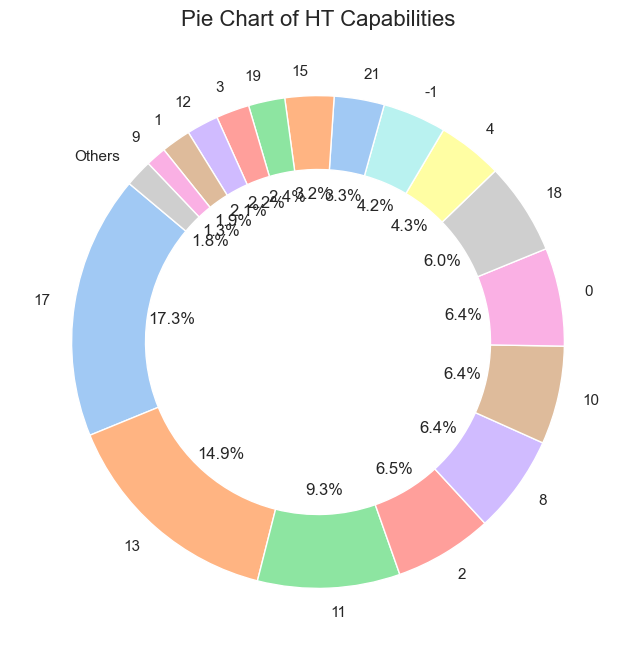

In [25]:
plotHelper.plot_pie_chart(combined_df, "HT Capabilities", other_percentage=0.01)

#### HE Capabilities

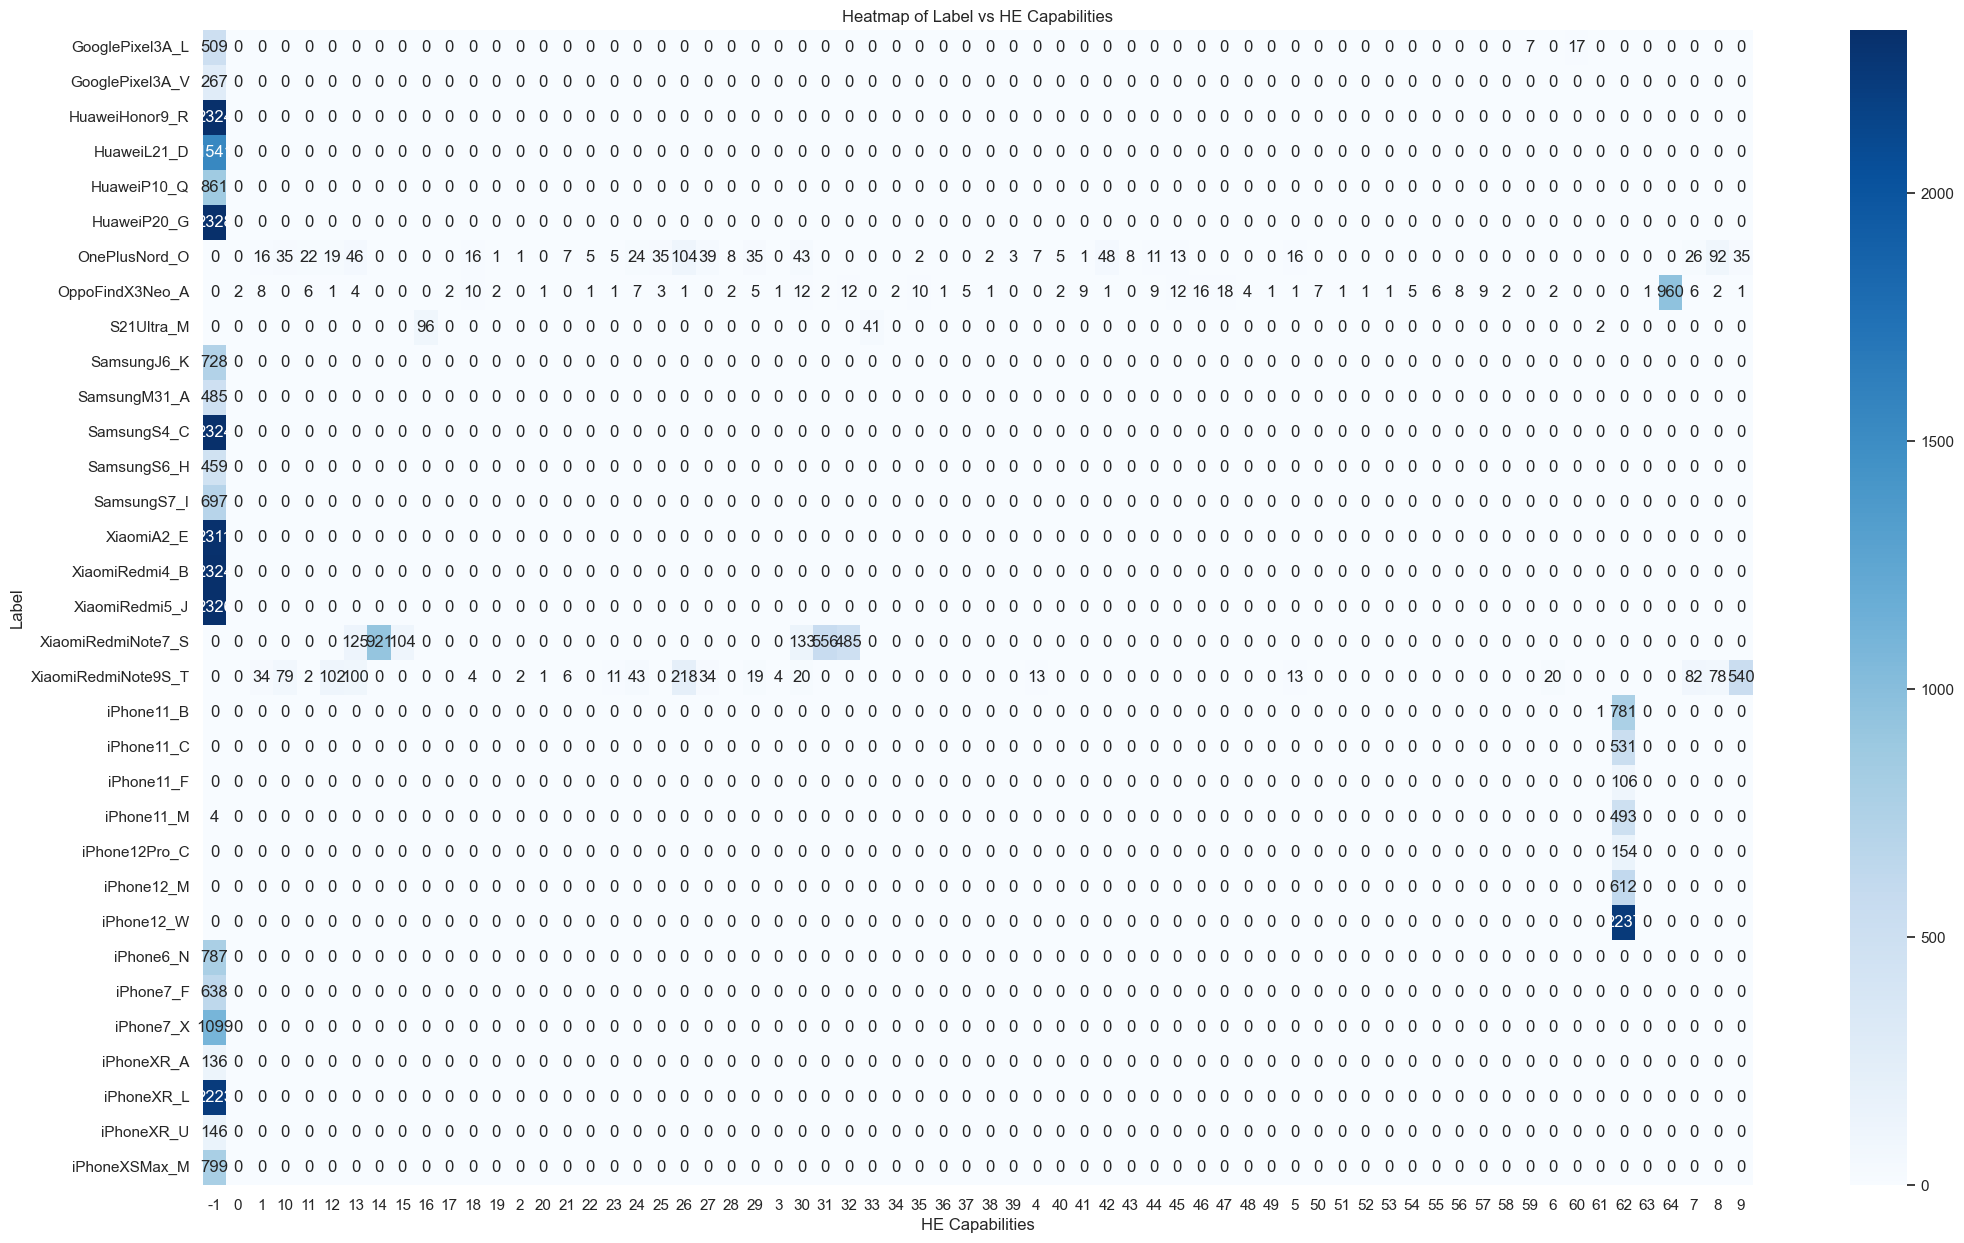

In [26]:
plotHelper.plot_heatmap(combined_df, "Label", "HE Capabilities")

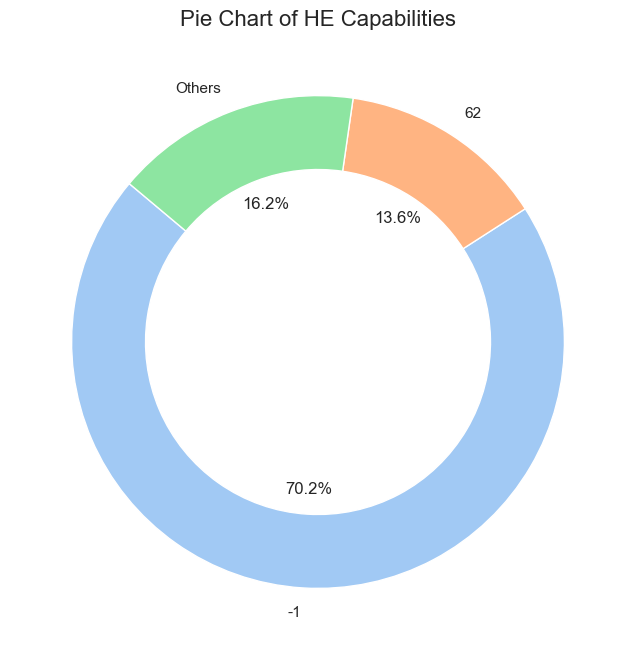

In [27]:
plotHelper.plot_pie_chart(combined_df, "HE Capabilities")

#### Supported Rates

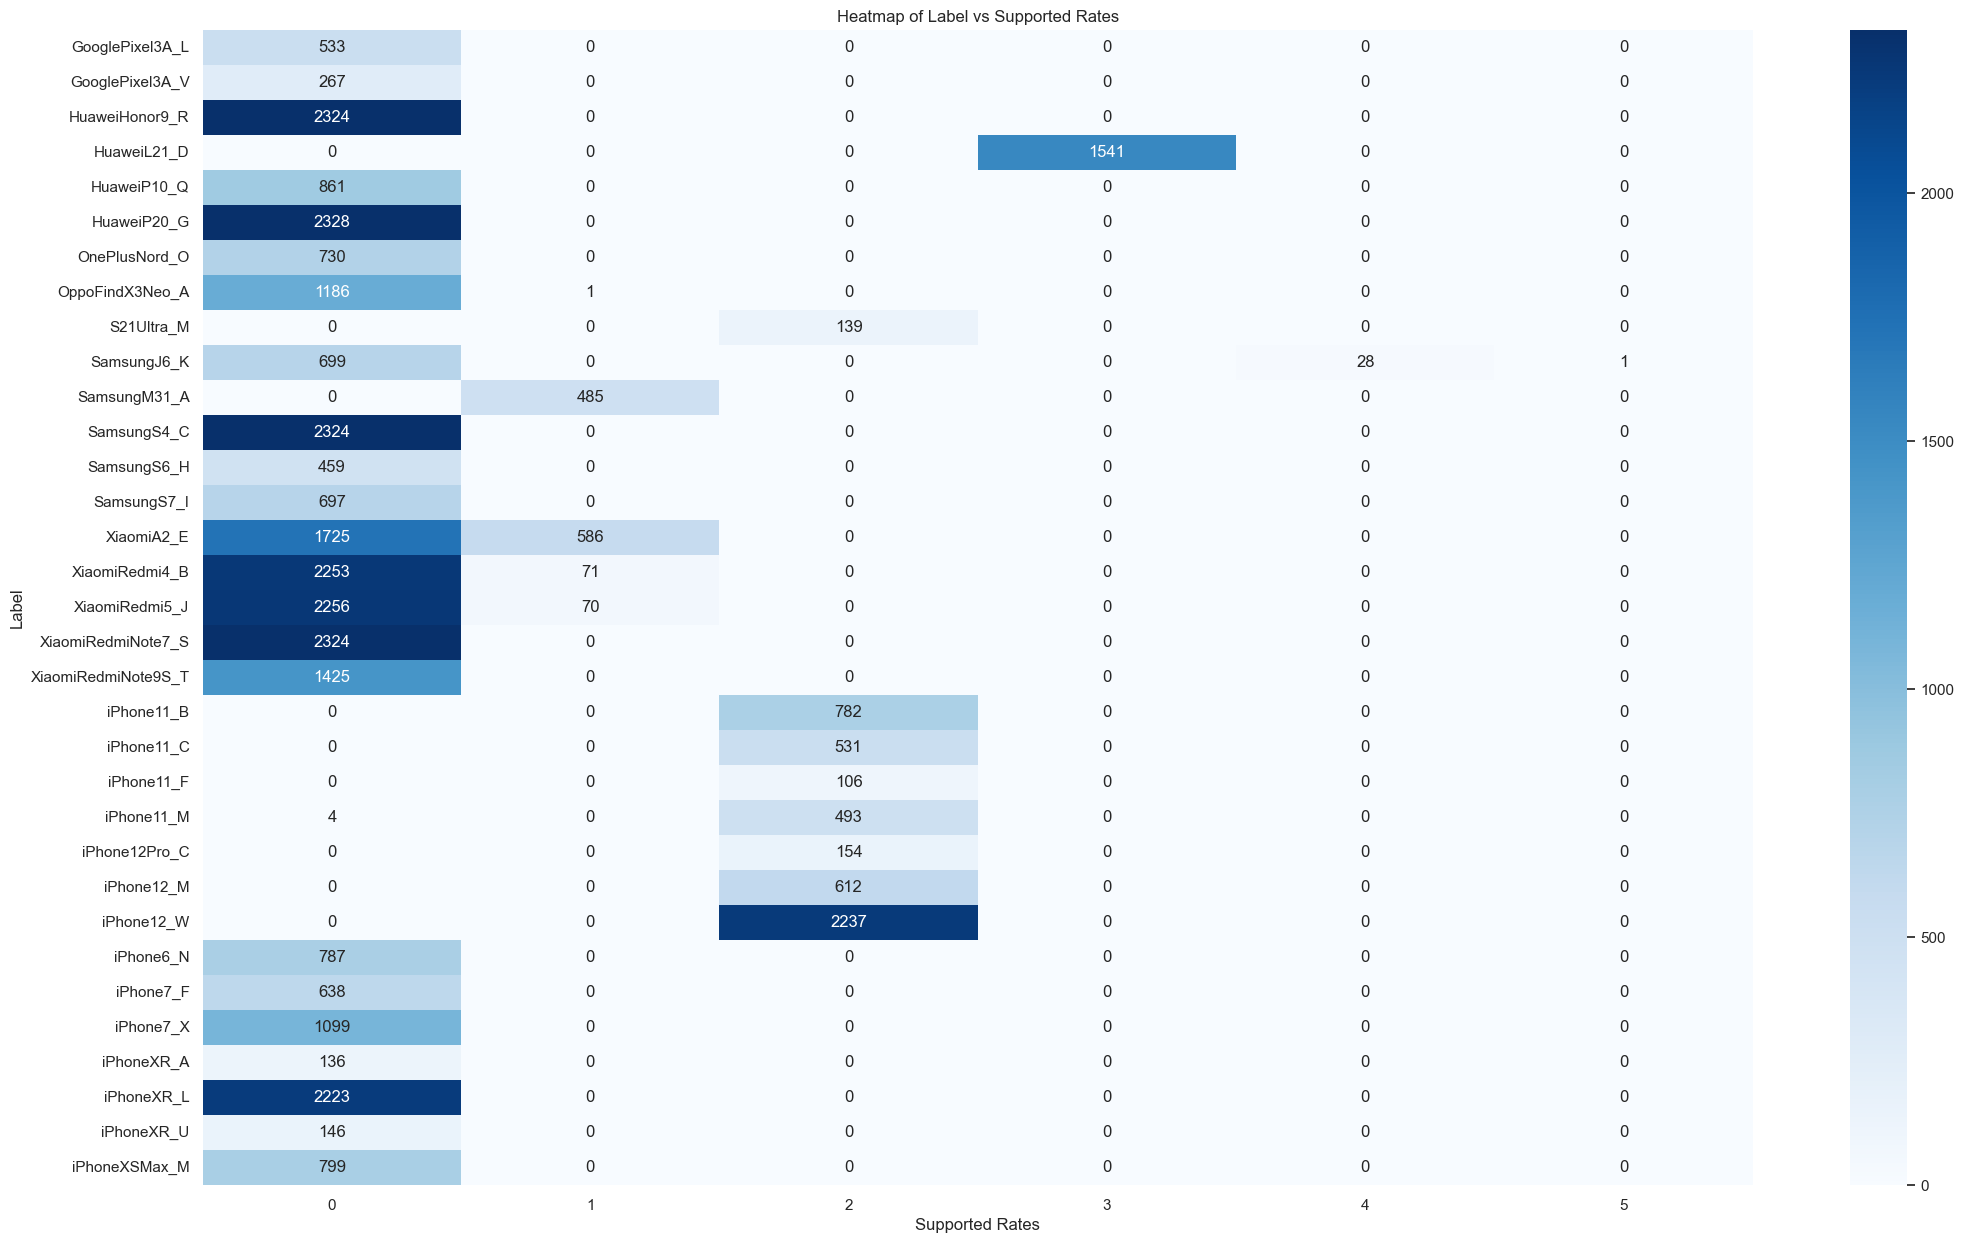

In [28]:
plotHelper.plot_heatmap(combined_df, "Label", "Supported Rates")

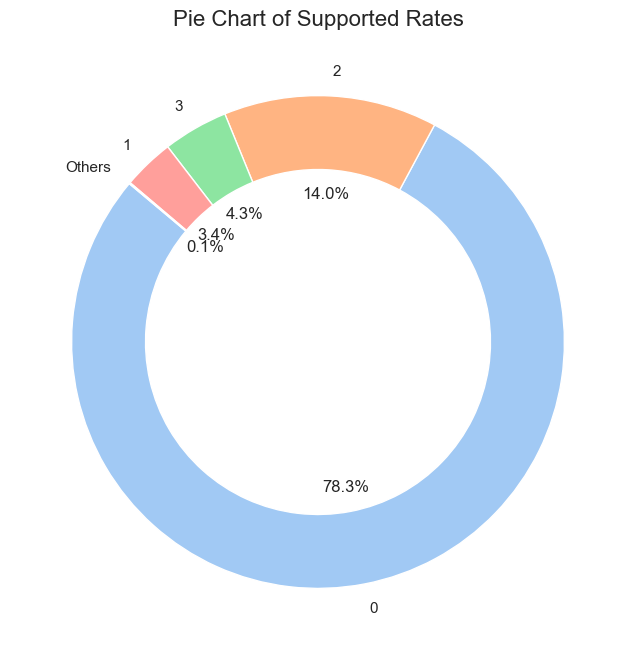

In [29]:
plotHelper.plot_pie_chart(combined_df, "Supported Rates", other_percentage=0.01)

#### Extended Supported Rates

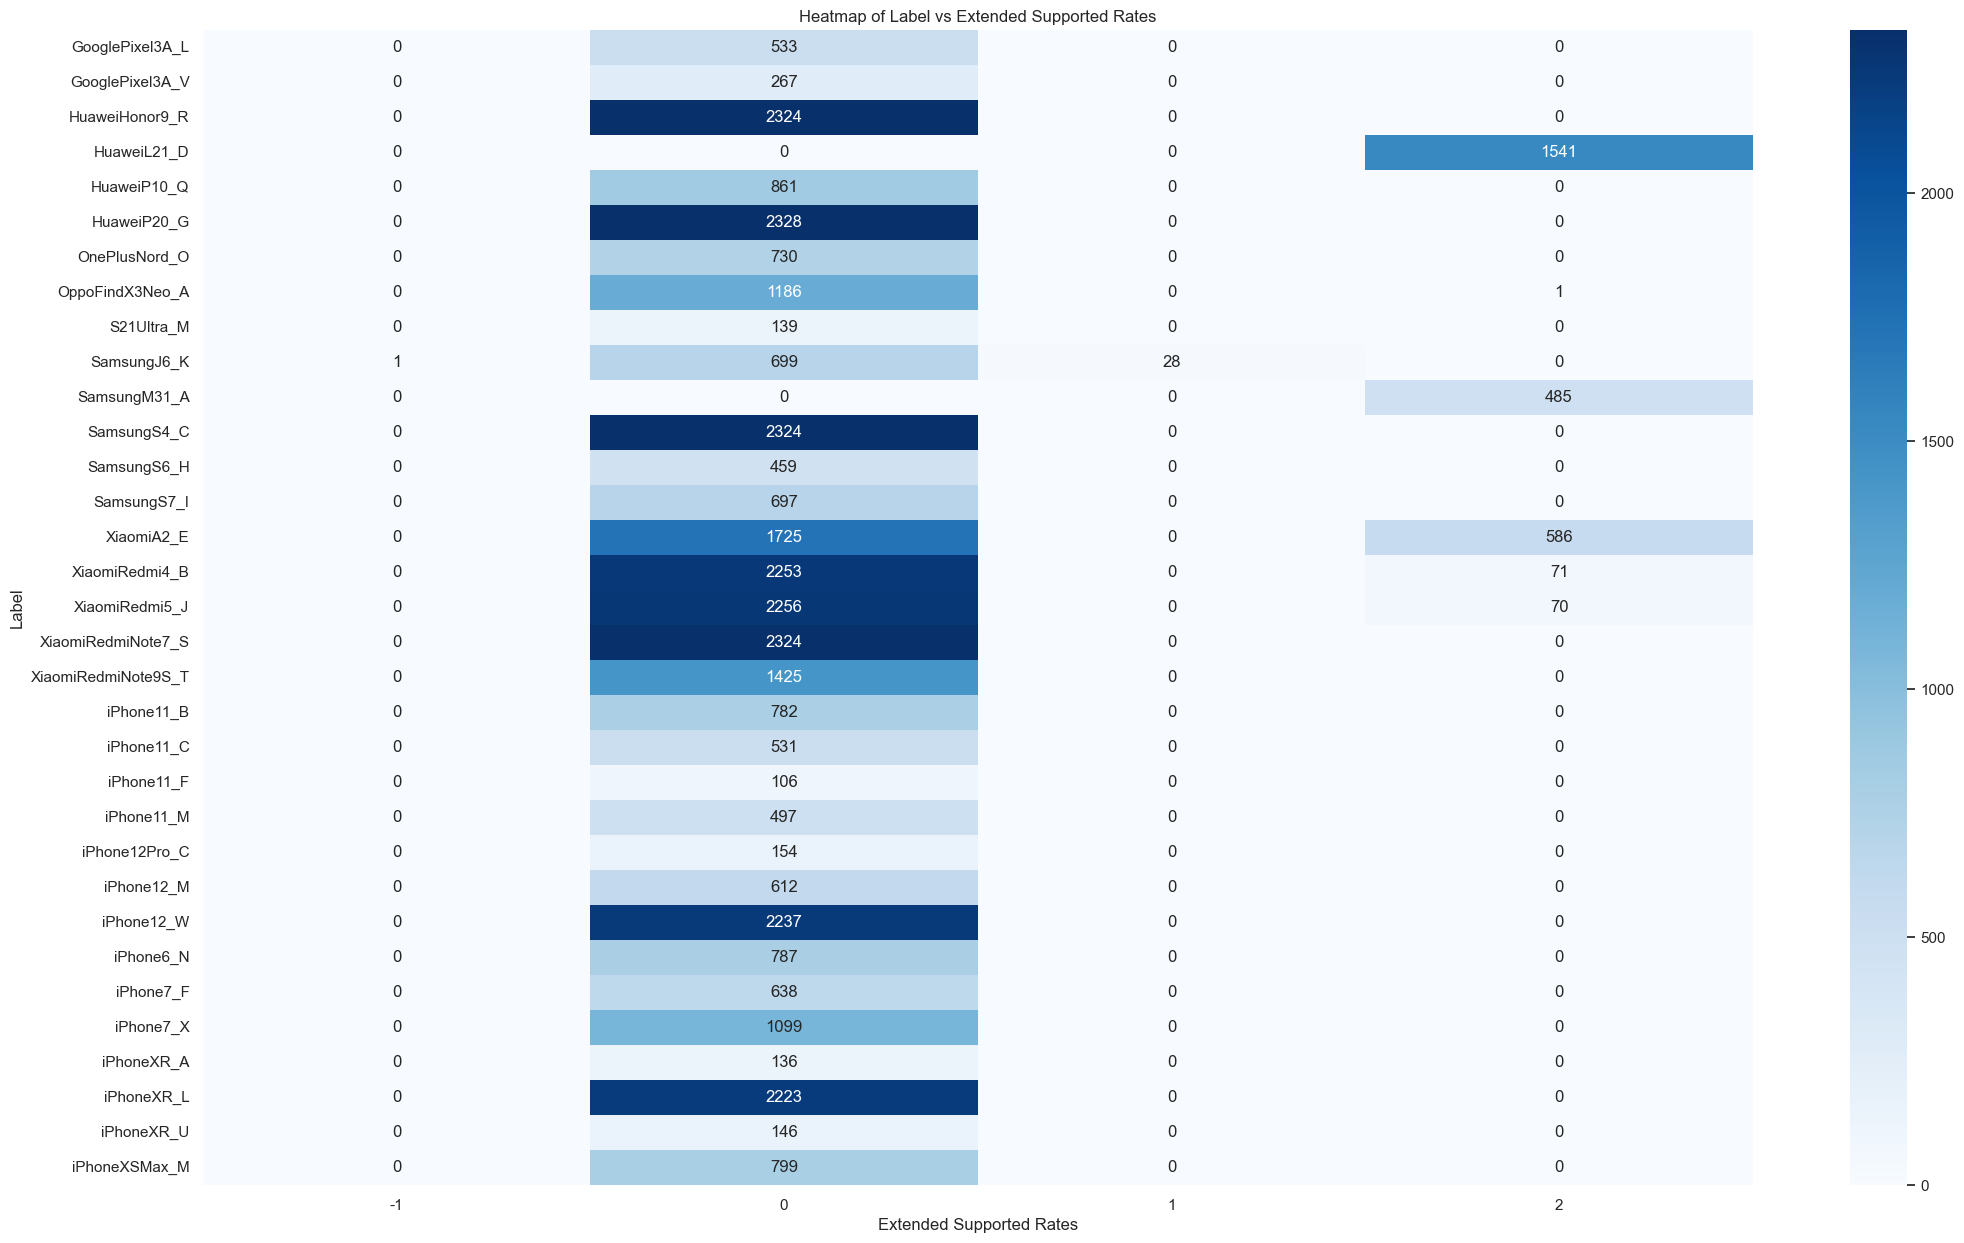

In [30]:
plotHelper.plot_heatmap(combined_df, "Label", "Extended Supported Rates")

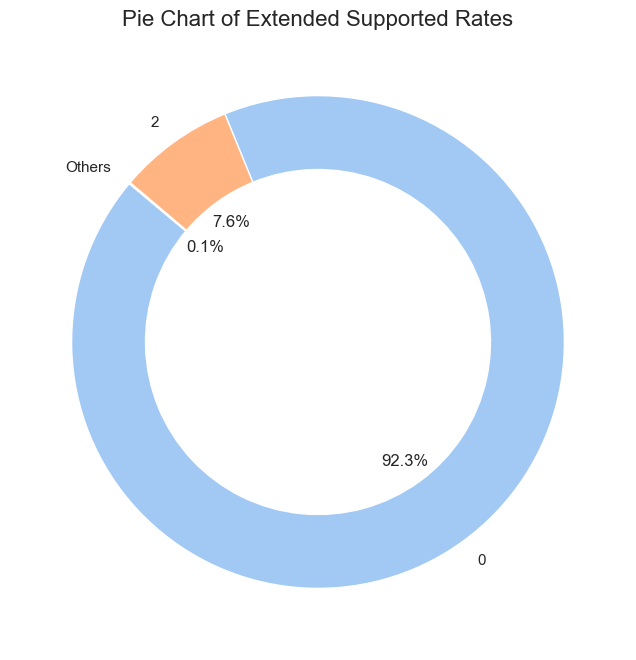

In [31]:
plotHelper.plot_pie_chart(combined_df, "Extended Supported Rates")

#### Vendor Specific Tags

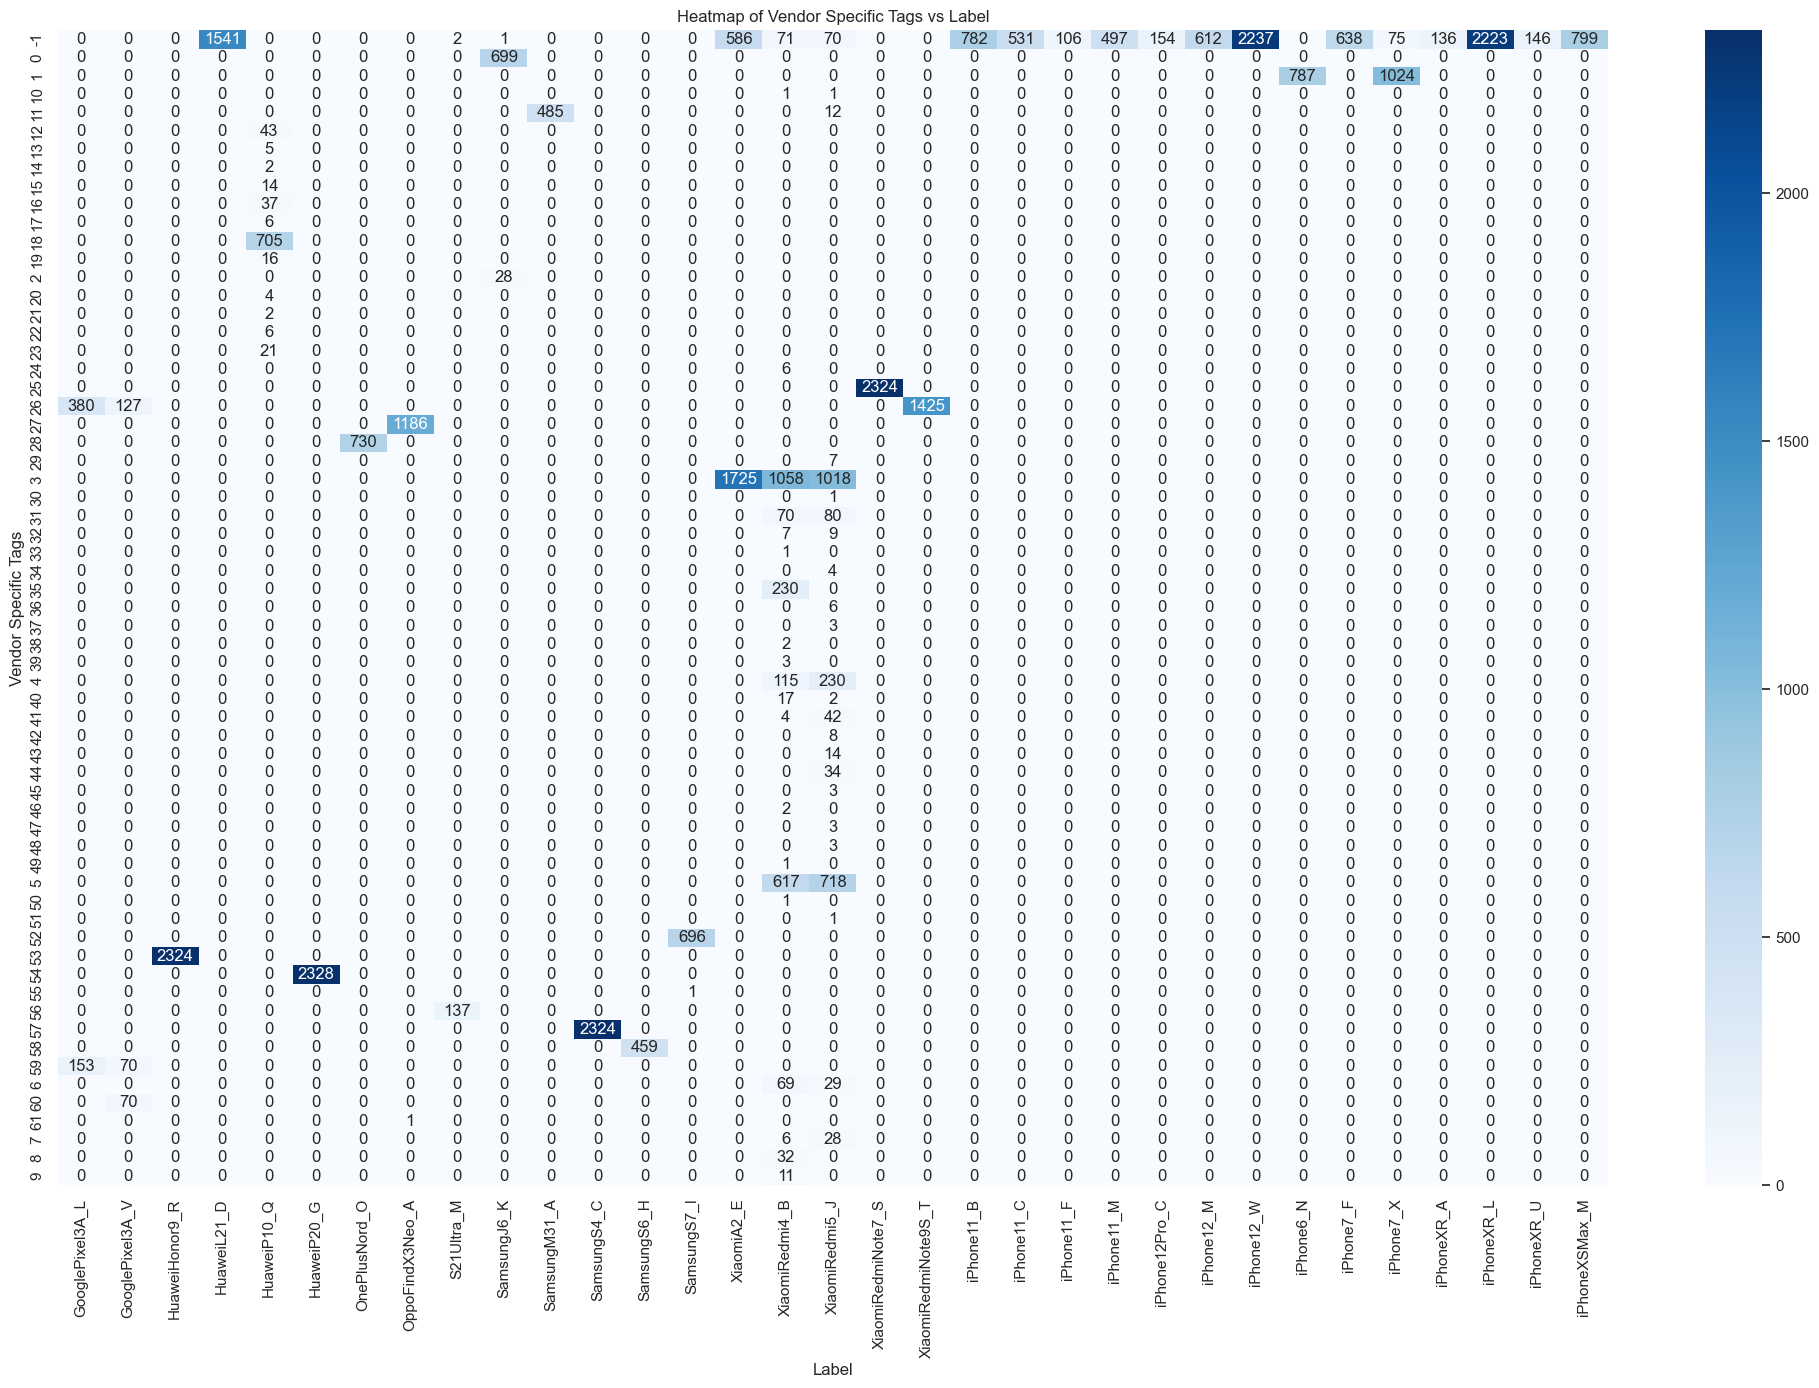

In [32]:
plotHelper.plot_heatmap(combined_df, "Vendor Specific Tags", "Label")

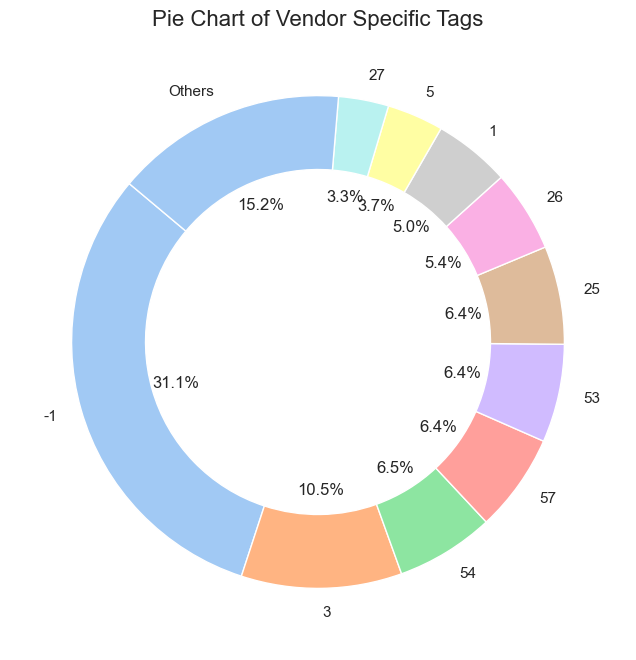

In [33]:
plotHelper.plot_pie_chart(combined_df, "Vendor Specific Tags", other_percentage=0.03)

#### Extended Capabilities

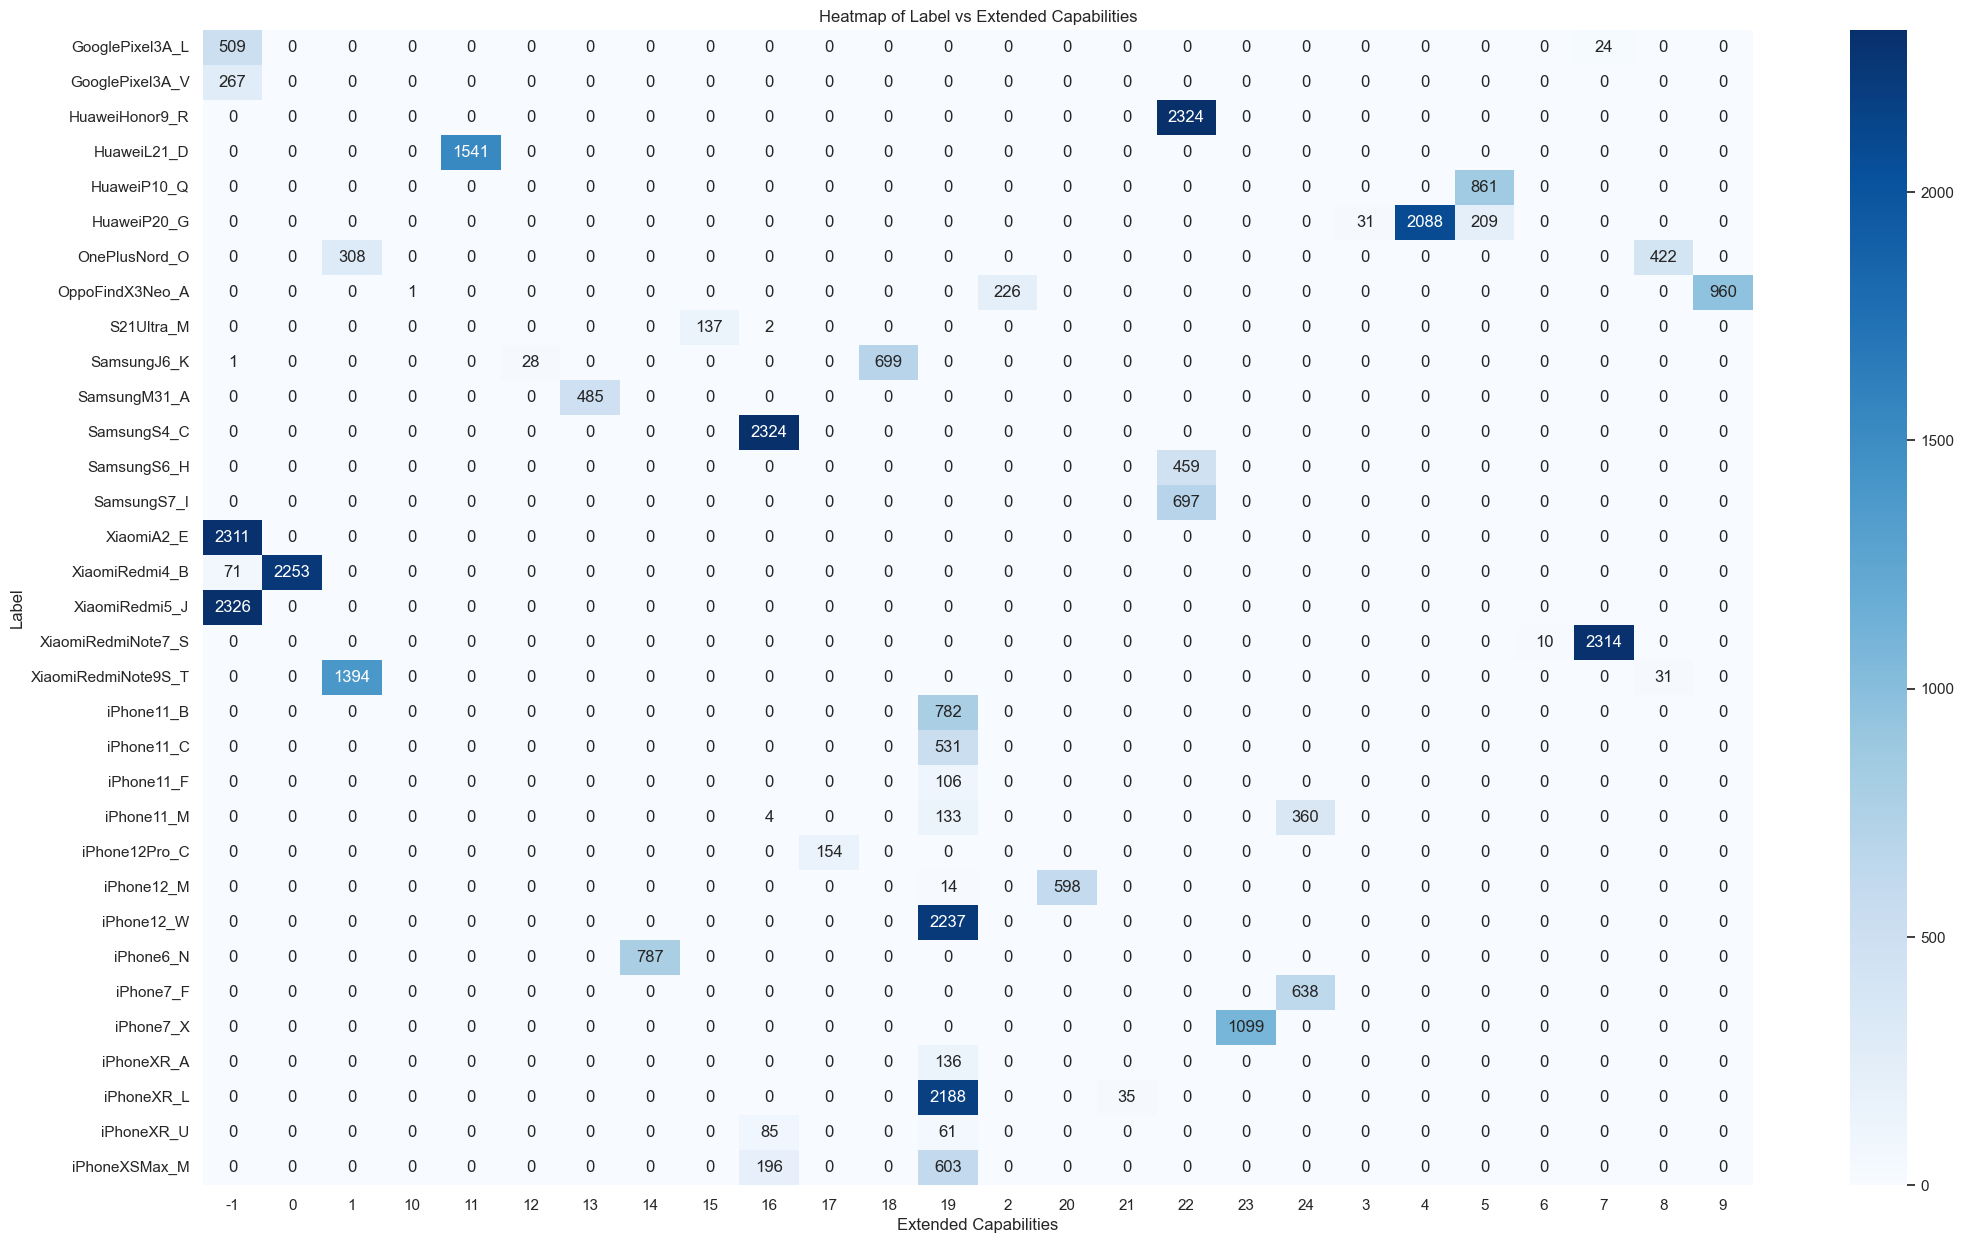

In [34]:
plotHelper.plot_heatmap(combined_df, "Label", "Extended Capabilities")

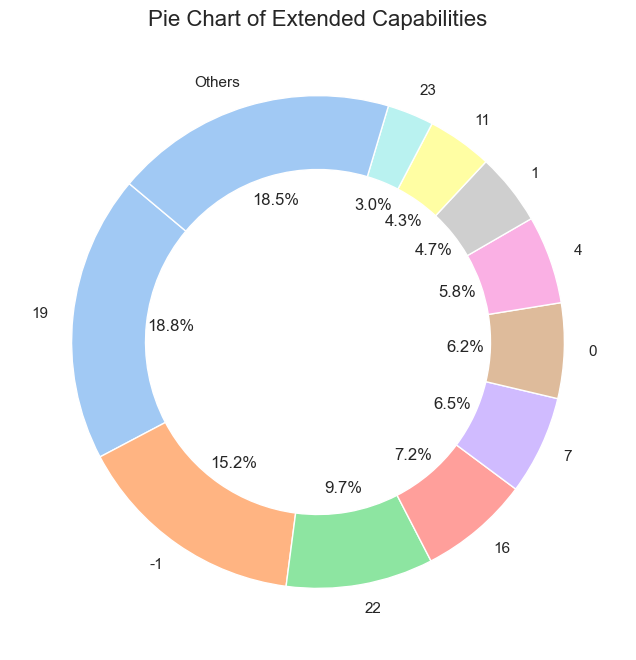

In [35]:
plotHelper.plot_pie_chart(combined_df, "Extended Capabilities", other_percentage=0.03)

#### VHT Capabilities

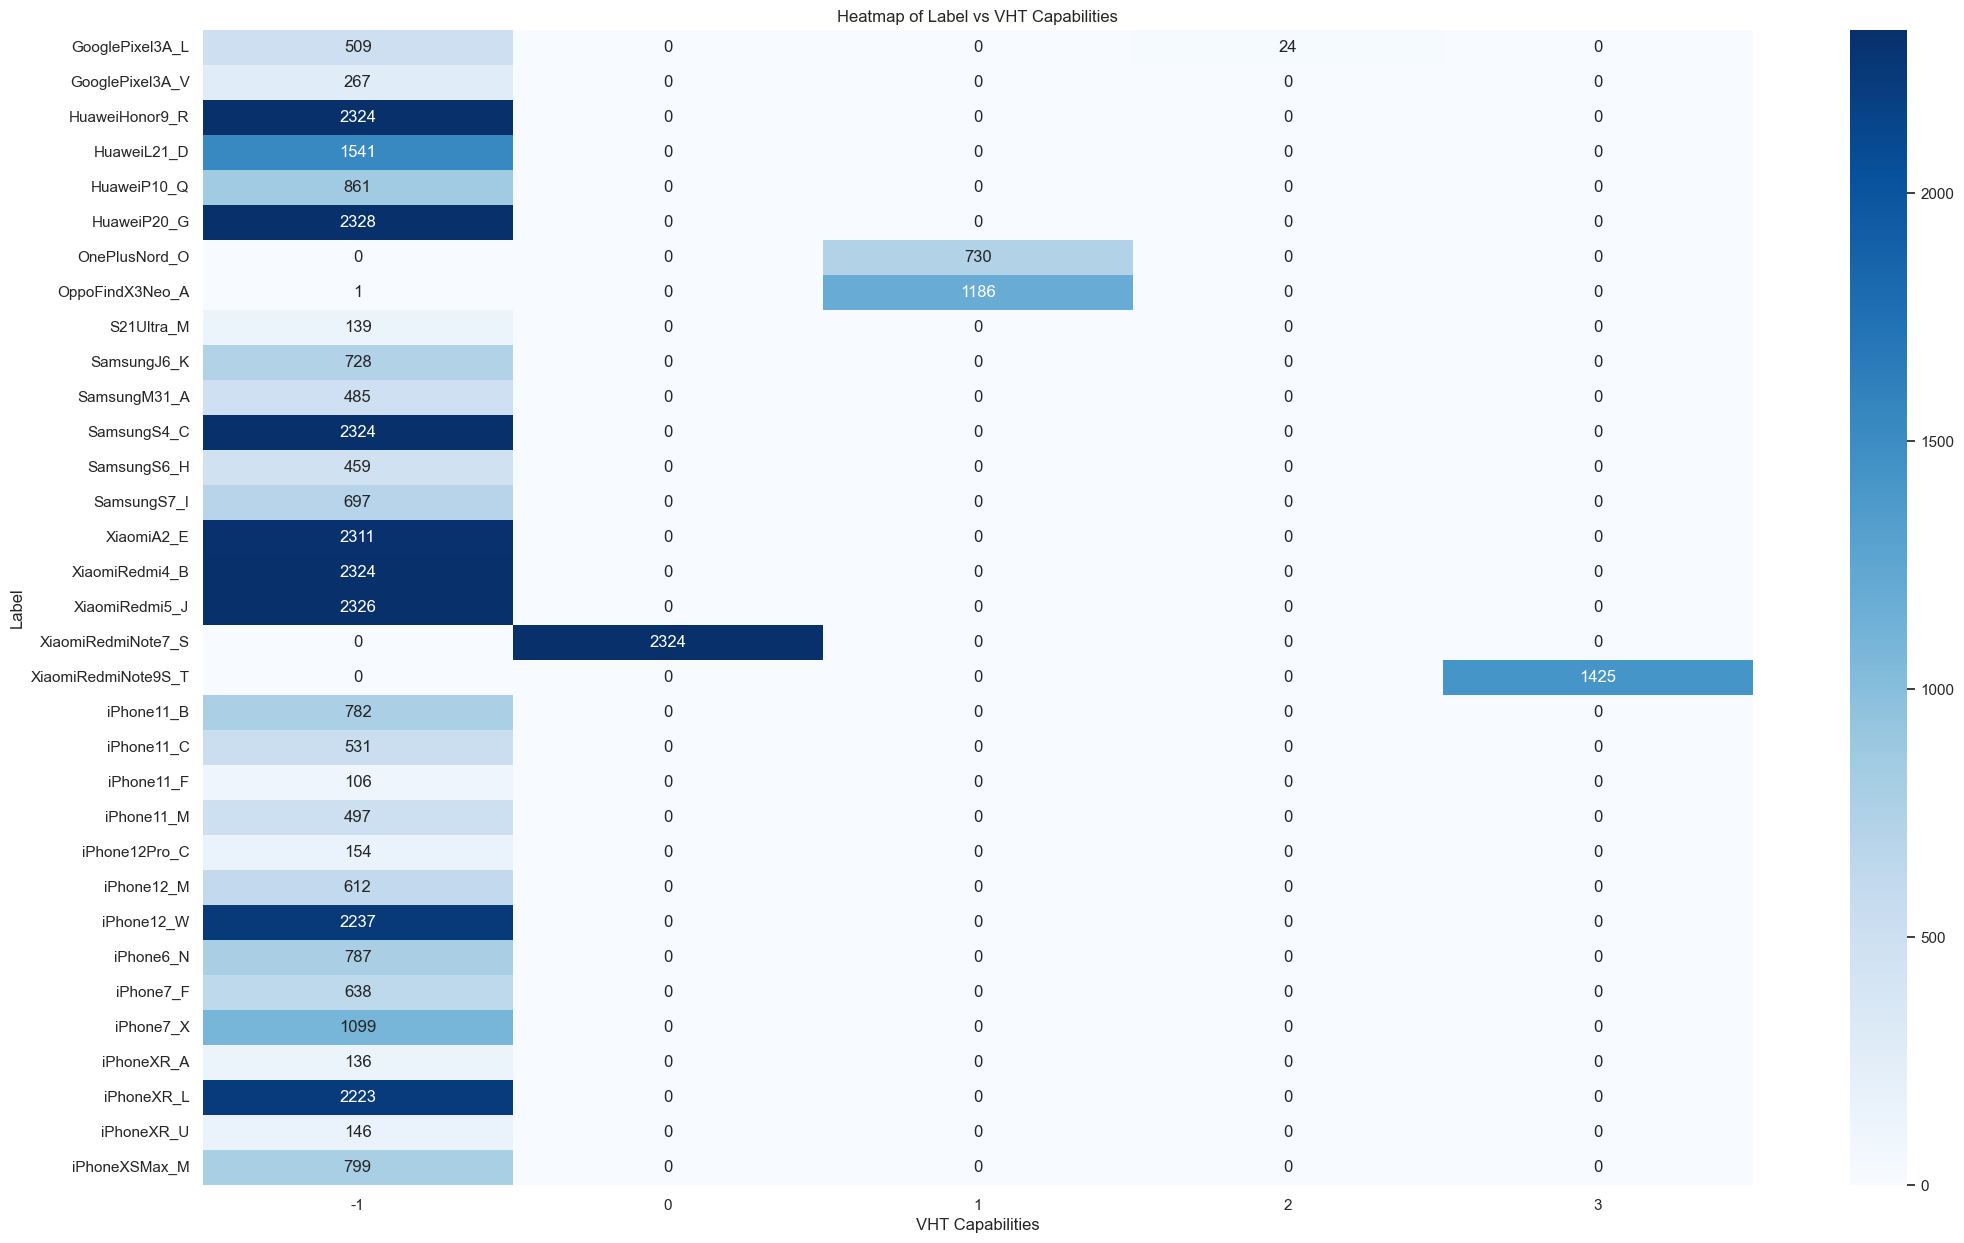

In [36]:
plotHelper.plot_heatmap(combined_df, "Label", "VHT Capabilities")

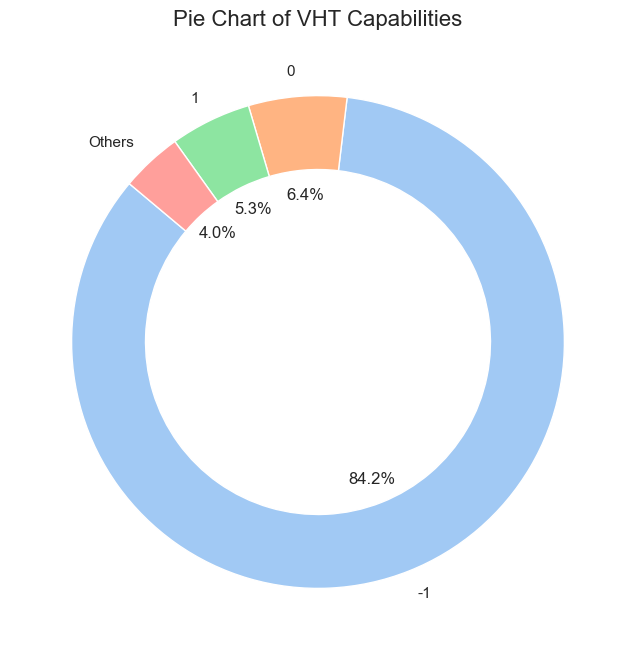

In [37]:
plotHelper.plot_pie_chart(combined_df, "VHT Capabilities")